In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv', sep = "\t", low_memory = False)

In [3]:
# Nous écrivont un code nous permettant de filter les chaines de caractères contenant les différentes abréviations pour la france 
def pays (df, cle =['FR', 'Fr', 'fR', 'fr']):
    list_pays = [i for i in df['countries'].value_counts().index.values
                 if any(lettre in i for lettre in cle)]
    a = df[df['countries_fr'].isin(list_pays)]
    return a

In [4]:
# Nous affichons les résultats dans un nouveau dataframe
df2 = pays(df)

### 
### Partie Nettoyage
### 

#### Filtrage Initial

In [5]:

# Nous voulons garder uniquement les colonnes qui nous intéressent

# On supprime les colonnes allant de 'creator' à 'last_modified_datetime'

df3 = df2.drop(df2.iloc[:, 2:7], axis=1)

In [6]:
df4 = df3.drop(df3.iloc[:, 3:4], axis=1)

In [7]:
df5 = df4.drop(df4.iloc[:, 4:27], axis = 1)

In [8]:
df6 = df5.drop(df5.iloc[:, 5:25], axis = 1)

In [9]:
df7 = df6.drop(df6.iloc[:, 5:6], axis = 1)

In [10]:
df8 = df7.drop(df7.iloc[:, 6:10], axis = 1)

In [11]:
df9 = df8.drop(df8.iloc[:, 7:9], axis = 1)

In [12]:
df10 = df9.drop(df9.iloc[:, 8:10], axis = 1)

In [13]:
df11 = df10.drop(df10.iloc[:, 9:44], axis = 1)

In [14]:
df12 = df11.drop(df11.iloc[:, 10:18], axis = 1)

In [15]:
df13 = df12.drop(df12.iloc[:, 12:15], axis = 1)

In [16]:
df14 = df13.drop(df13.iloc[:, 13:54], axis = 1)

In [17]:
df15 = df14.drop(df14.iloc[:, 14:17], axis = 1)

In [18]:
df16 = df15.drop_duplicates(['code'], 'first')

In [19]:
df17 = df16.loc[-(df16['saturated-fat_100g'] > 100)]

In [20]:
df18 = df17.loc[-((df17['energy_100g'] == 3.251373e+06)|(df17['energy_100g'] == 182764.000000)|(df17['energy_100g'] == 69292.000000)|(df17['energy_100g'] == 15481.000000))]

In [21]:
df19 = df18.loc[-(df18['energy_100g'] > 1831)]

In [22]:
df20 = df19.loc[-((df19['sugars_100g']<0)|(df19['sugars_100g']>100))]

In [23]:
df21 = df20.loc[-(df20['salt_100g'] > 100)]

In [24]:
df22 = df21[df21['product_name'].notnull()]

### 
## Visualisation des valeurs manquantes et corrélation par rapport au valeurs manquantes
### 

<AxesSubplot:>

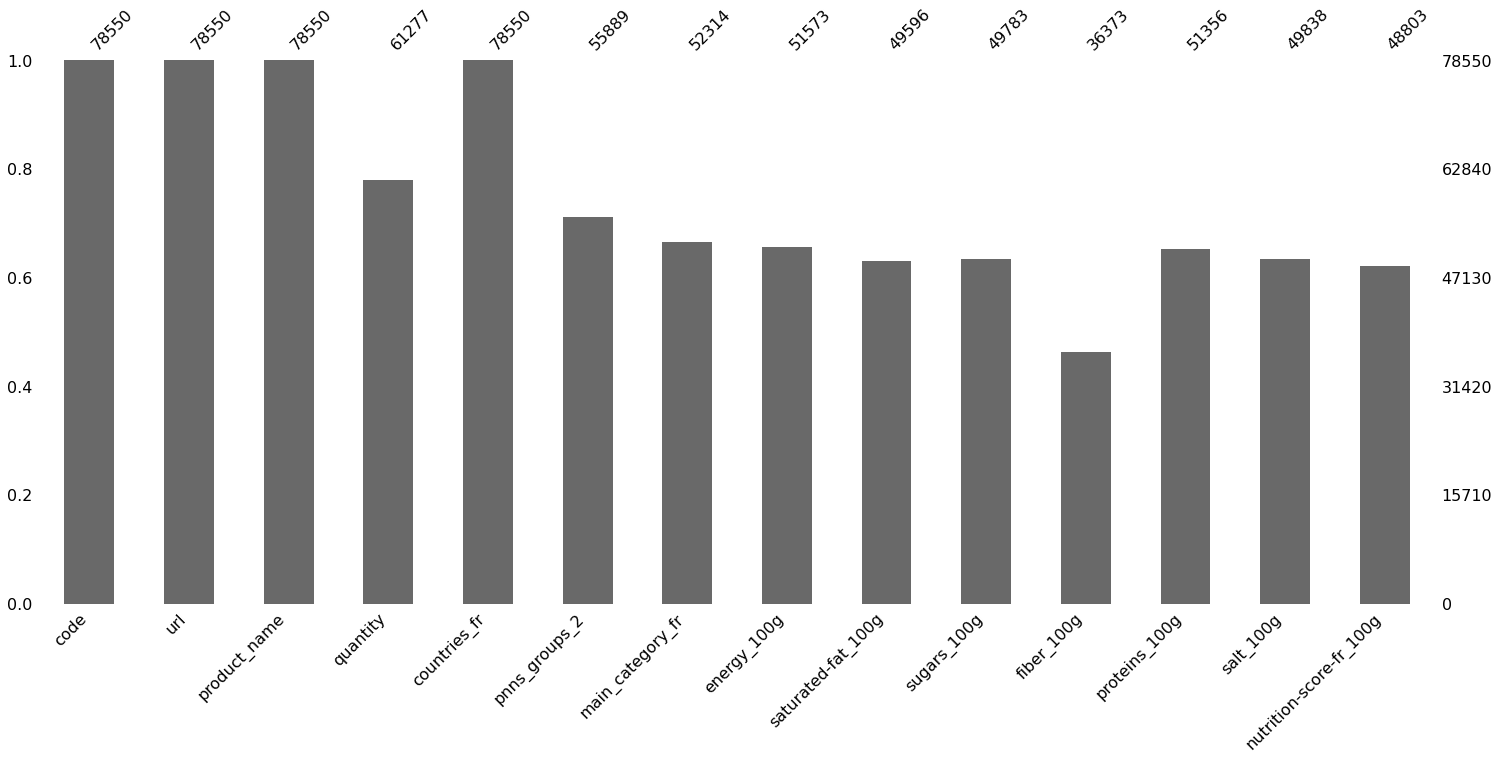

In [25]:

# Visualisation des valeurs présente sous forme de barres 

msno.bar(df22)


<AxesSubplot:>

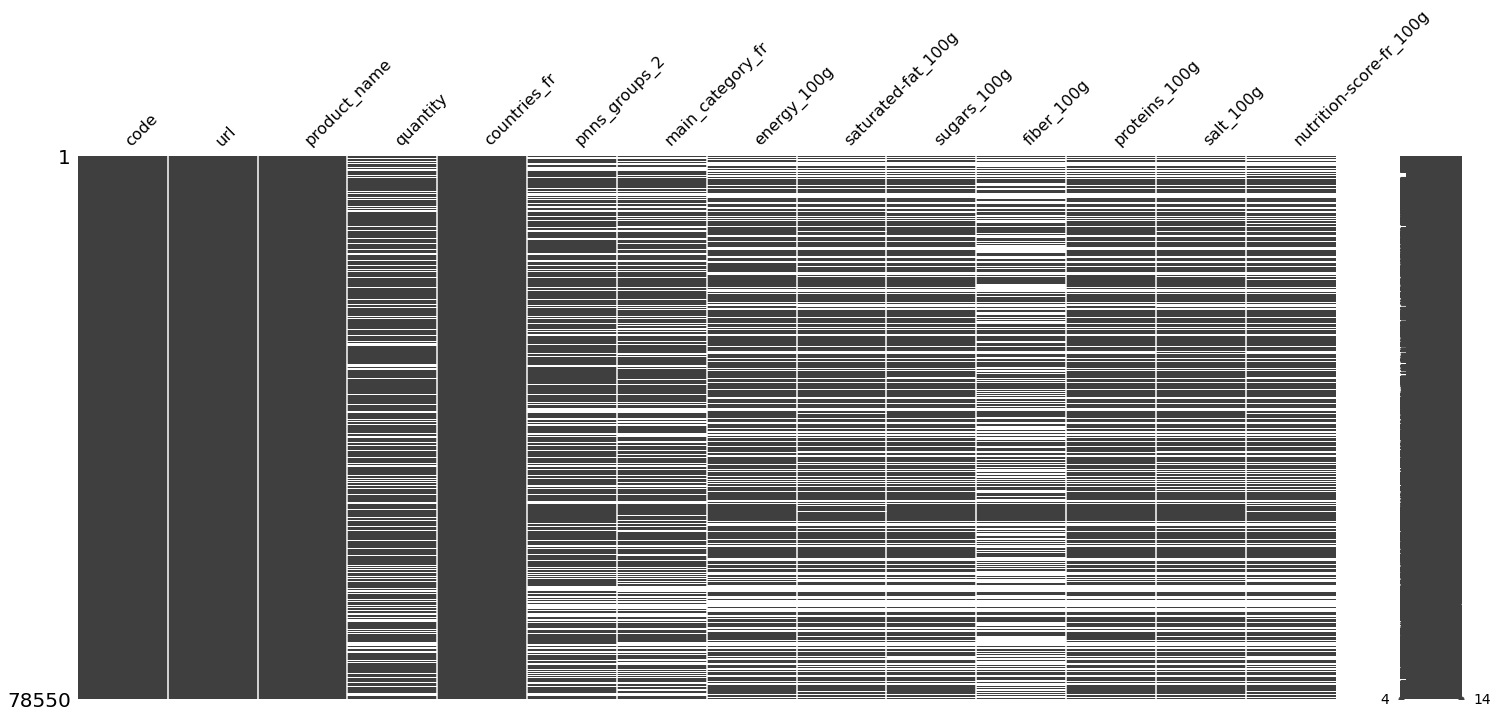

In [26]:

# Visualisation des valeurs manquantes et présente sous forme de matrice

msno.matrix(df22)


<AxesSubplot:>

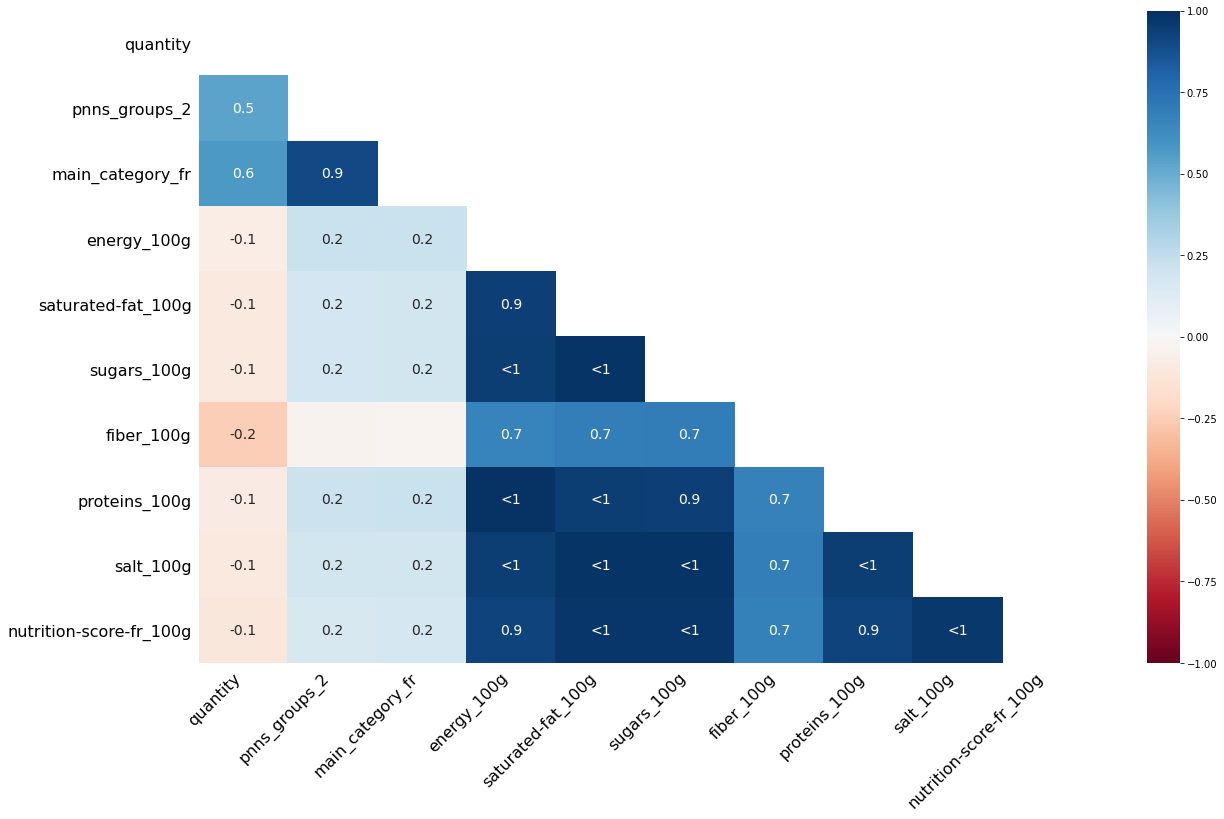

In [27]:

# Corrélation entre les features par rapport aux NaN

msno.heatmap(df22)


<AxesSubplot:>

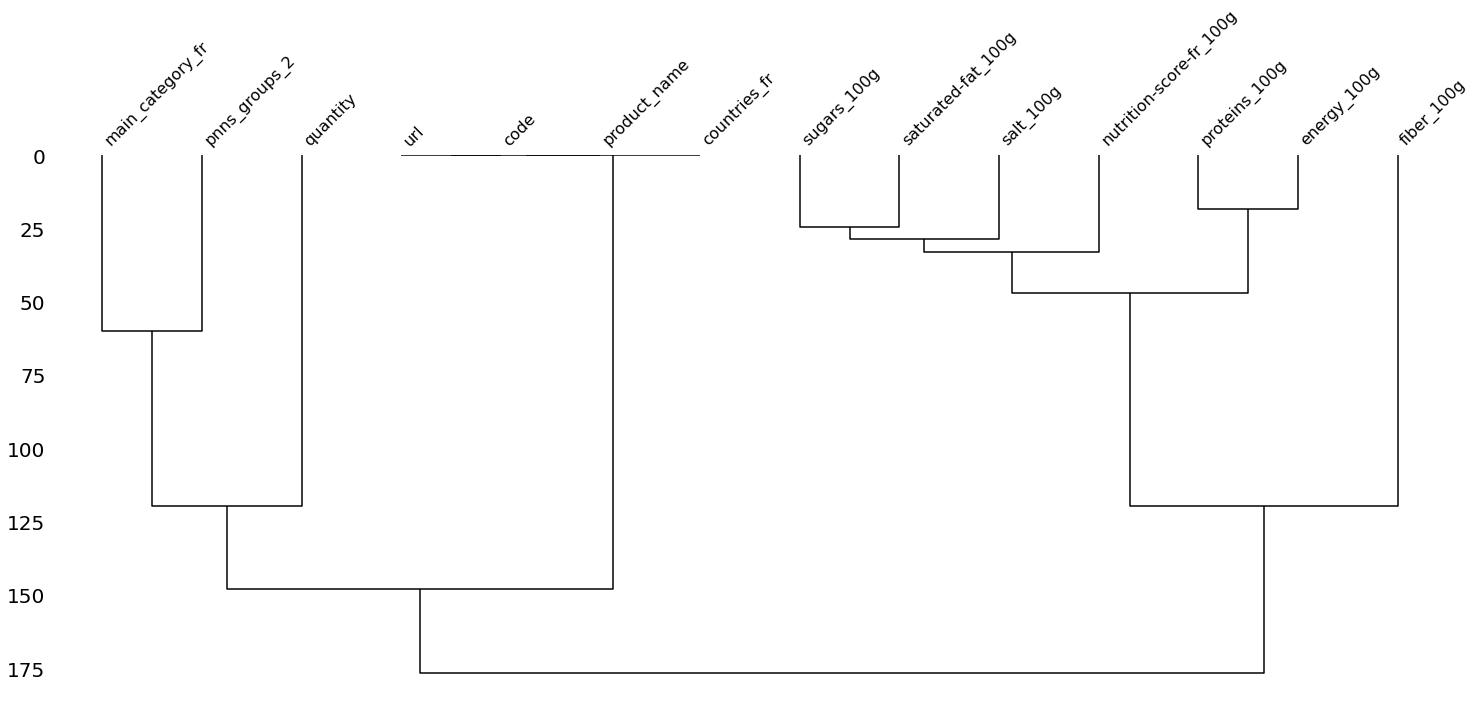

In [28]:

# Regroupemt hiérarchique des variables corrélées par rapport aux valeurs manquantes (plus les regroupement sont séparés
# moins il y a de corrélation par rapport aux valeurs manquantes)
# On voit ici deux groupe distinct, le premier groupe a un taux plus élevé de valeurs manquantes que le deuxième


msno.dendrogram(df22)


#  
# 
# Analyse Univariée

# 
## Variables catégorielles
#### 



### La variable Main_category_fr

In [29]:

# Information sur main_catégories_fr

# Nous n'effectuons pas d'opération sur cette colonnes nous la gardons cette colonne à titre d'information

df22['main_category_fr'].describe()

count        52314
unique        1436
top       Boissons
freq          4275
Name: main_category_fr, dtype: object

In [30]:
a = df22['main_category_fr'].value_counts()
b = a.index
tableau = pd.DataFrame(b, columns = ['main_category_fr'])

# On définit et on calcule nos deux colonnes
tableau['n'] = a.values
tableau['frequence'] = tableau['n'] / len(df22)

# On trie nos valeurs par ordre alphabétique
tableau = tableau.sort_values('main_category_fr')

# On cumule la somme des fréquences 
tableau['Frequence_cumulee'] = tableau['frequence'].cumsum()
tableau

,main_category_fr,n,frequence,Frequence_cumulee
459,A-code-1,1,0.000013,0.000013
660,Ab,1,0.000013,0.000025
1036,Abats-surgeles,1,0.000013,0.000038
1423,Abdijbier,1,0.000013,0.000051
266,Accras-de-morue,2,0.000025,0.000076
...,...,...,...,...
446,ru:Confectionaries,1,0.000013,0.664367
222,ru:Сухарики,3,0.000038,0.664405
1348,vi:Gia-vị,1,0.000013,0.664418
998,zh:Sauce-de-soja,1,0.000013,0.664430


In [31]:

# Pour Afficher les différentes catégories

# df22['main_category_fr'].unique().tolist()


# 
# 
### Le pnns_groups_2

<AxesSubplot:>

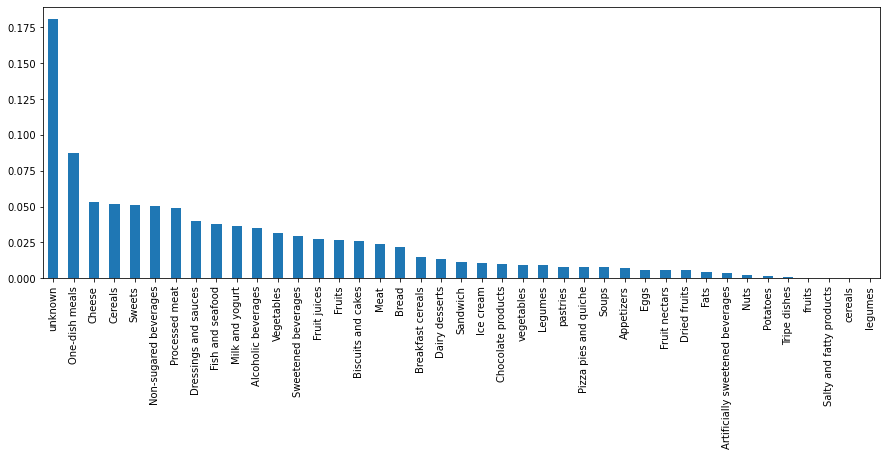

In [32]:

# Distribution du pnns_groups_2

plt.figure(figsize=(15,5))
df22['pnns_groups_2'].value_counts(normalize=True).plot(kind='bar')



# 
# 
## Variables Quantitatives
#### 

# 
### fiber_100g    ->    Les fibres pour 100g (partie effectuée dans le nootbook nettoyage)

In [33]:
df22['fiber_100g'] = df22['fiber_100g'].replace(np.nan,0)

<ipython-input-33-ee67cf9989f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22['fiber_100g'] = df22['fiber_100g'].replace(np.nan,0)


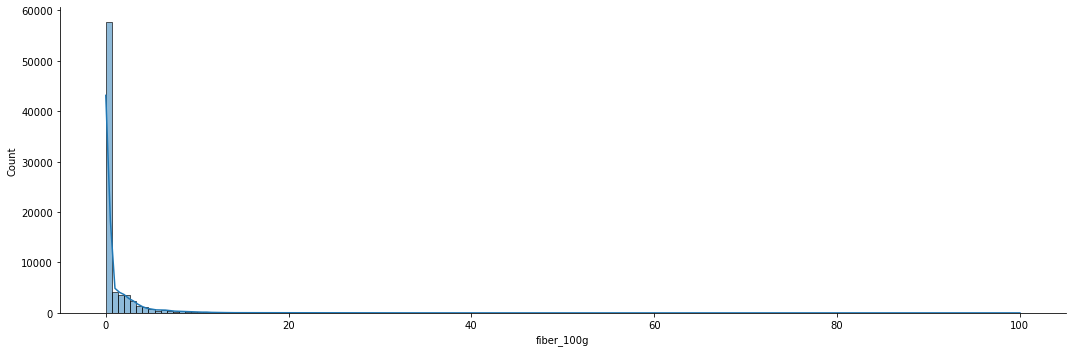

In [78]:
# Distribution des fibres après imputation des nan par 0

sns.displot(x = 'fiber_100g', data = df22, kde = True, aspect = 3, bins=150)

#### 
## On utilise le knn Imputer


In [34]:
df22


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,0.0,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
138,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",unknown,NaN,1481.0,NaN,NaN,6.2,6.25,NaN,NaN
182,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,1 kg,France,Legumes,Aliments et boissons à base de végétaux,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,0.0,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,0.2,0.50,0.0254,2.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [35]:
knnI = KNNImputer(n_neighbors = 4)

In [36]:
kn = make_column_transformer((knnI, ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g',
                                     'nutrition-score-fr_100g']), remainder='passthrough')

In [37]:
a = kn.fit_transform(df22)

In [38]:
df23 = pd.DataFrame(a, columns = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g', 'code', 'url', 'product_name', 'quantity', 'countries_fr', 'pnns_groups_2', 'main_category_fr', 'fiber_100g'])
df23

,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,fiber_100g
0,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,0.0
1,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,0.0
2,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,0.0
3,1481.0,1.5075,21.4075,6.25,1.66,8.75,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",unknown,NaN,6.2
4,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,1 kg,France,Legumes,Aliments et boissons à base de végétaux,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78545,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,0.0
78546,21.0,0.2,0.5,0.5,0.0254,2.0,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,0.2
78547,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,0.0
78548,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,0.0


In [39]:


df24 = df23[[ 'code', 'url', 'product_name', 'quantity', 'countries_fr', 'pnns_groups_2', 'main_category_fr','energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g', 'fiber_100g']]
df24


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,fiber_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0.0
1,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0.0
2,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0.0
3,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",unknown,NaN,1481.0,1.5075,21.4075,6.25,1.66,8.75,6.2
4,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,1 kg,France,Legumes,Aliments et boissons à base de végétaux,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78545,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0.0
78546,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,0.5,0.0254,2.0,0.2
78547,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0.0
78548,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0.0


In [40]:
sts = StandardScaler()

In [41]:
Sn = make_column_transformer((sts, ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g',
                                     'nutrition-score-fr_100g', 'fiber_100g']), remainder='passthrough')

In [42]:
s_stand = Sn.fit_transform(df24)

In [43]:
s_stand

array([[-0.0005124620400592906, 0.0001688608622442204,
        0.002144265165519206, ..., 'France', nan, nan],
       [-0.0005124620400592906, 0.0001688608622442204,
        0.002144265165519206, ..., 'France', 'unknown', 'Filet-de-boeuf'],
       [-0.0005124620400592906, 0.0001688608622442204,
        0.002144265165519206, ..., 'France', 'unknown', nan],
       ...,
       [-0.0005124620400592906, 0.0001688608622442204,
        0.002144265165519206, ..., 'France', nan, nan],
       [-0.0005124620400592906, 0.0001688608622442204,
        0.002144265165519206, ..., 'France', 'Processed meat',
        'Produits à tartiner salés'],
       [-0.0005124620400592906, 0.0001688608622442204,
        0.002144265165519206, ..., 'France', nan, nan]], dtype=object)

In [44]:
df25 = pd.DataFrame(s_stand, columns = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g', 'fiber_100g', 'code', 'url', 'product_name', 'quantity', 'countries_fr', 'pnns_groups_2', 'main_category_fr'])
df25

,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,fiber_100g,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr
0,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN
1,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf
2,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN
3,1.487061,-0.412557,0.704944,-0.222523,0.120111,0.395768,1.563647,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",unknown,NaN
4,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,1 kg,France,Legumes,Aliments et boissons à base de végétaux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78545,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons
78546,-1.846756,-0.709383,-0.721261,-1.086442,-0.325223,-0.6641,-0.257671,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts
78547,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN
78548,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés


In [45]:
df25 = df25[[ 'code', 'url', 'product_name', 'quantity', 'countries_fr', 'pnns_groups_2', 'main_category_fr','energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g', 'fiber_100g']]
df25

,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,fiber_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382
1,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382
2,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382
3,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",unknown,NaN,1.487061,-0.412557,0.704944,-0.222523,0.120111,0.395768,1.563647
4,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,1 kg,France,Legumes,Aliments et boissons à base de végétaux,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78545,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382
78546,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,-1.846756,-0.709383,-0.721261,-1.086442,-0.325223,-0.6641,-0.257671
78547,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382
78548,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382


In [46]:
sim = SimpleImputer(strategy='most_frequent')

In [47]:
Sin = make_column_transformer((sim, ['pnns_groups_2', 'main_category_fr']), remainder='passthrough')

In [48]:
str_imput = Sin.fit_transform(df25)

In [73]:
str_imput

array([['unknown', 'Boissons', '0000000003087', ...,
        0.0017717788038624253, 0.0014620714197152377,
        -0.31838189512757376],
       ['unknown', 'Filet-de-boeuf', '0000000024600', ...,
        0.0017717788038624253, 0.0014620714197152377,
        -0.31838189512757376],
       ['unknown', 'Boissons', '0000000039259', ...,
        0.0017717788038624253, 0.0014620714197152377,
        -0.31838189512757376],
       ...,
       ['unknown', 'Boissons', '9918', ..., 0.0017717788038624253,
        0.0014620714197152377, -0.31838189512757376],
       ['Processed meat', 'Produits à tartiner salés', '9935010000003',
        ..., 0.0017717788038624253, 0.0014620714197152377,
        -0.31838189512757376],
       ['unknown', 'Boissons', '9980282863788', ...,
        0.0017717788038624253, 0.0014620714197152377,
        -0.31838189512757376]], dtype=object)

In [74]:
df26 = pd.DataFrame(str_imput, columns = ['pnns_groups_2', 'main_category_fr', 'code', 'url', 'product_name', 'quantity', 'countries_fr', 'energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g', 'fiber_100g'])
df26

,pnns_groups_2,main_category_fr,code,url,product_name,quantity,countries_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,fiber_100g
0,unknown,Boissons,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382
1,unknown,Filet-de-boeuf,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382
2,unknown,Boissons,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382
3,unknown,Boissons,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",1.487061,-0.412557,0.704944,-0.222523,0.120111,0.395768,1.563647
4,Legumes,Aliments et boissons à base de végétaux,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,1 kg,France,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78545,Alcoholic beverages,Boissons,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382
78546,Non-sugared beverages,Thés verts,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,-1.846756,-0.709383,-0.721261,-1.086442,-0.325223,-0.6641,-0.257671
78547,unknown,Boissons,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382
78548,Processed meat,Produits à tartiner salés,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,-0.000512,0.000169,0.002144,0.002834,0.001772,0.001462,-0.318382


In [75]:
df26 = df26[[ 'code', 'url', 'product_name', 'quantity', 'countries_fr', 'pnns_groups_2', 'main_category_fr','energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'fiber_100g', 'nutrition-score-fr_100g']]
df26

,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,fiber_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,unknown,Boissons,-0.000512,0.000169,0.002144,0.002834,0.001772,-0.318382,0.001462
1,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,-0.000512,0.000169,0.002144,0.002834,0.001772,-0.318382,0.001462
2,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,Boissons,-0.000512,0.000169,0.002144,0.002834,0.001772,-0.318382,0.001462
3,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",unknown,Boissons,1.487061,-0.412557,0.704944,-0.222523,0.120111,1.563647,0.395768
4,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,1 kg,France,Legumes,Aliments et boissons à base de végétaux,-0.000512,0.000169,0.002144,0.002834,0.001772,-0.318382,0.001462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78545,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,-0.000512,0.000169,0.002144,0.002834,0.001772,-0.318382,0.001462
78546,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,-1.846756,-0.709383,-0.721261,-1.086442,-0.325223,-0.257671,-0.6641
78547,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,unknown,Boissons,-0.000512,0.000169,0.002144,0.002834,0.001772,-0.318382,0.001462
78548,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,-0.000512,0.000169,0.002144,0.002834,0.001772,-0.318382,0.001462


# 
# 
## Après avoir utilisé le KNNImputer nous vérifions de nouveau 
## la distribution des variables

 
# 
### energy_100g    ->    L'énergie pour 100g

#### 
#### Distribution de energy_100g avant et après imputation par KNNImputer

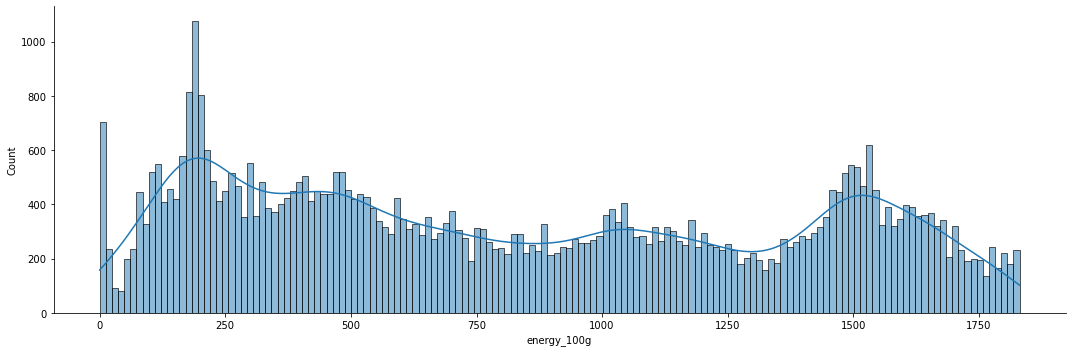

In [50]:

# Dans le but de comparer voici la distribution avant imputation

sns.displot(data = df22, x = 'energy_100g', kde = True, aspect = 3, bins=150)

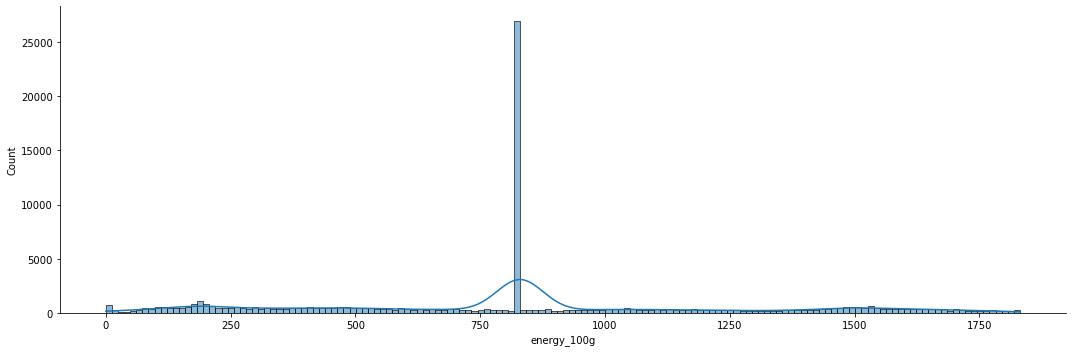

In [51]:

# Dans le but de comparer voici la distribution après imputation

df24['energy_100g'] = df24['energy_100g'].astype(float)
sns.displot(data = df24, x = df24 ['energy_100g'], kde = True, aspect = 3, bins=150)

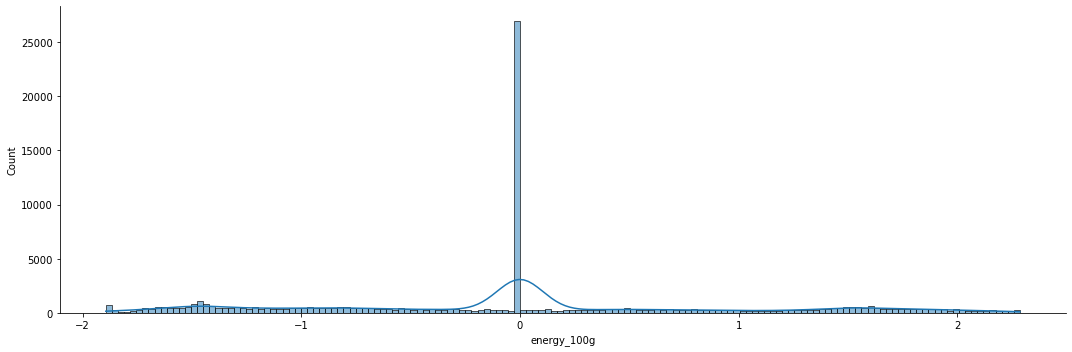

In [148]:
# Dans le but de comparer voici la distribution après imputation (données standardisées)

df26['energy_100g'] = df26['energy_100g'].astype(float)
sns.displot(data = df26, x = df26 ['energy_100g'], kde = True, aspect = 3, bins=150)

# 
#### Boxplot de energy_100g avant et après imputation par KNNImputer

<AxesSubplot:xlabel='energy_100g'>

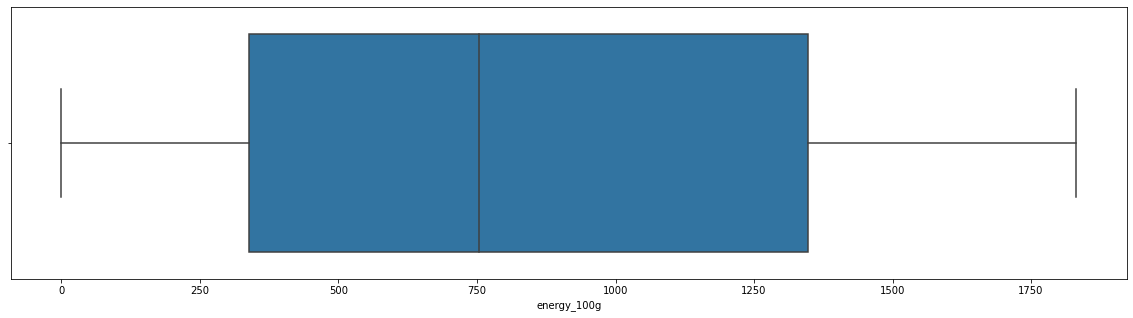

In [52]:

# Dans le but de comparer voici le boxplot avant imputation

plt.figure(figsize=(20, 5))
sns.boxplot(x = df22['energy_100g'])


<AxesSubplot:xlabel='energy_100g'>

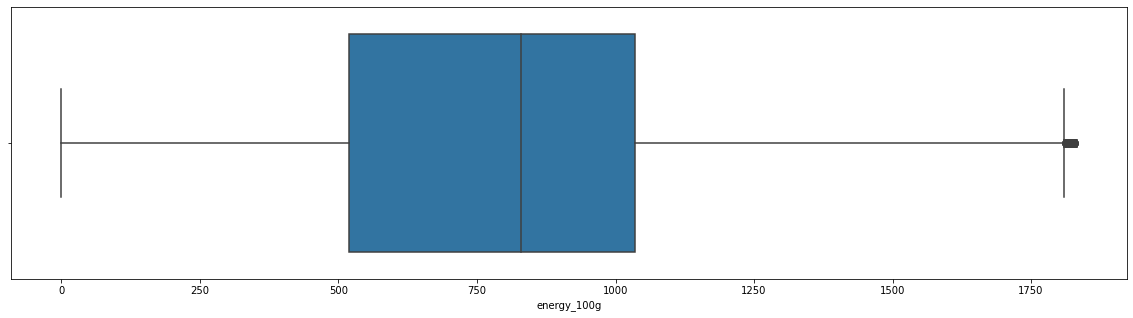

In [53]:

# Dans le but de comparer voici le boxplot après imputation

plt.figure(figsize=(20, 5))
sns.boxplot(x = df24['energy_100g'])


In [54]:
df22['energy_100g'].describe()

count    51573.000000
mean       829.537556
std        539.662830
min          0.000000
25%        338.000000
50%        753.000000
75%       1347.000000
max       1831.000000
Name: energy_100g, dtype: float64

In [55]:
df24['energy_100g'].describe()

count    78550.000000
mean       829.761982
std        437.939250
min          0.000000
25%        519.000000
50%        829.537556
75%       1035.000000
max       1831.000000
Name: energy_100g, dtype: float64

# 
# 
### saturated-fat_100g    ->    Les graisses saturées pour 100g

#### 
#### Distribution avant et après imputation par KNNImputer

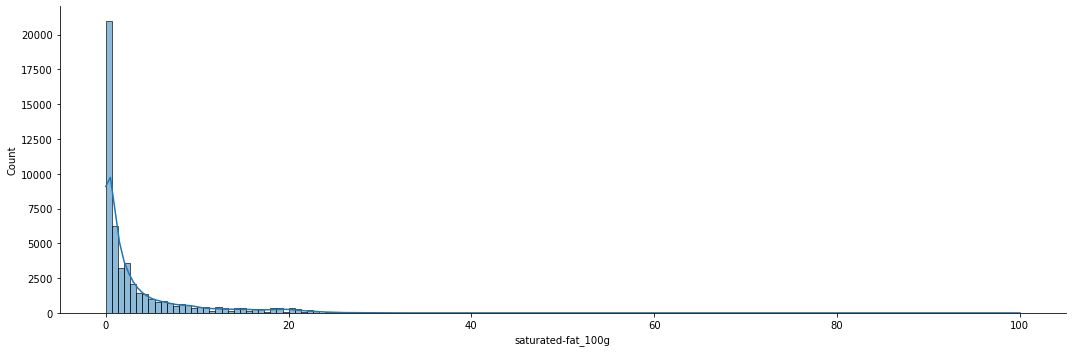

In [56]:

# Dans le but de comparer voici la distribution avant imputation

sns.displot(x = 'saturated-fat_100g', data = df22, kde = True, aspect = 3, bins=150)

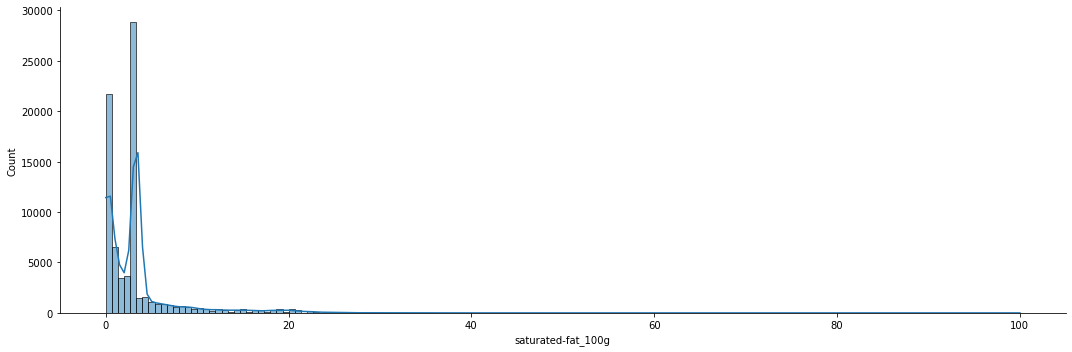

In [57]:

# Dans le but de comparer voici la distribution après imputation

df24['saturated-fat_100g'] = df24['saturated-fat_100g'].astype(float)
sns.displot(x ='saturated-fat_100g', data = df24, kde = True, aspect = 3, bins=150)

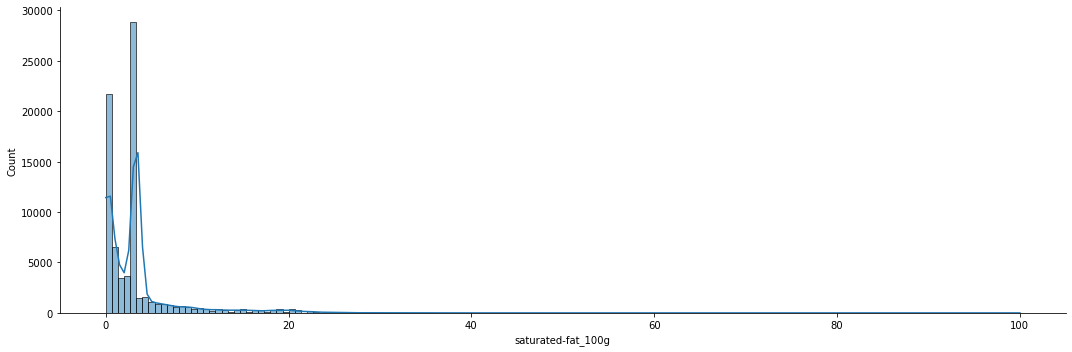

In [147]:
# Dans le but de comparer voici la distribution après imputation (données standardisées)

df26['saturated-fat_100g'] = df26['saturated-fat_100g'].astype(float)
sns.displot(x ='saturated-fat_100g', data = df24, kde = True, aspect = 3, bins=150)

# 
#### Boxplot avant et après imputation par KNNImputer

<AxesSubplot:xlabel='saturated-fat_100g'>

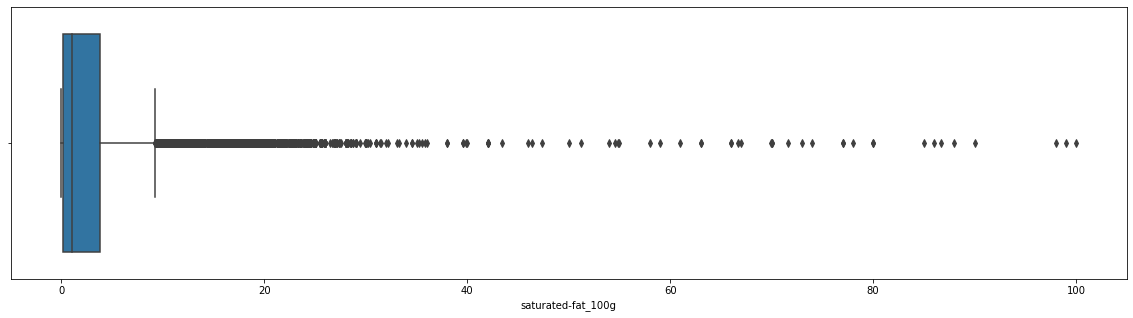

In [58]:

# Dans le but de comparer voici le boxplot avant imputation

plt.figure(figsize=(20, 5))
sns.boxplot(x = df22['saturated-fat_100g'])

<AxesSubplot:xlabel='saturated-fat_100g'>

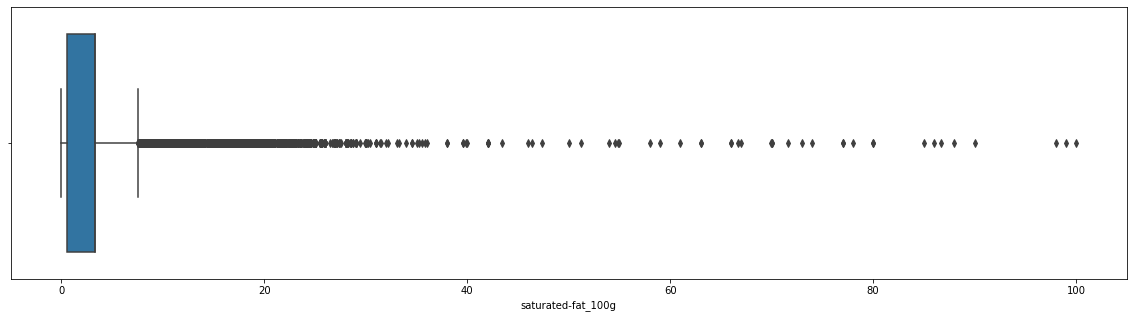

In [59]:

# Dans le but de comparer voici le boxplot après imputation

plt.figure(figsize=(20, 5))
sns.boxplot(x = df24['saturated-fat_100g'])

In [60]:
df22['saturated-fat_100g'].describe()

count    49596.000000
mean         3.325535
std          5.476892
min          0.000000
25%          0.200000
50%          1.000000
75%          3.800000
max        100.000000
Name: saturated-fat_100g, dtype: float64

In [61]:
df23['saturated-fat_100g'].describe()

count     78550.000000
unique     1670.000000
top           3.325535
freq      26666.000000
Name: saturated-fat_100g, dtype: float64

# 
# 
### sugars_100g    ->    Le sucre pour 100g

#### 
#### Distribution avant et après imputation par KNNImputer

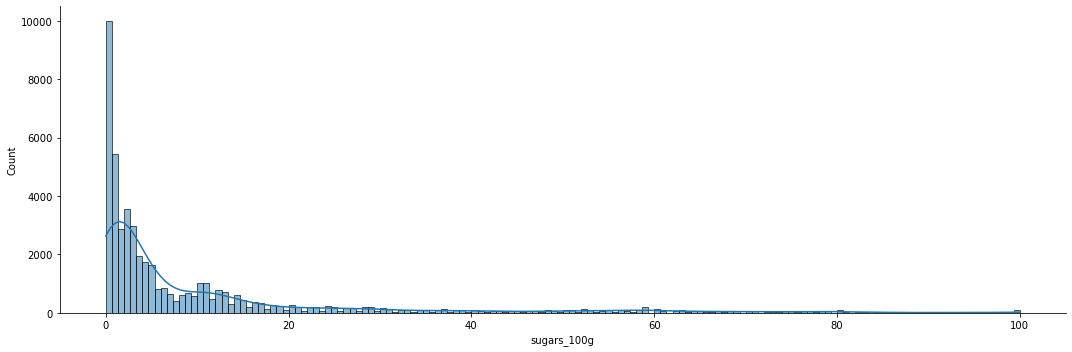

In [62]:

# Dans le but de comparer voici la distribution avant imputation

sns.displot(x = 'sugars_100g', data = df22, kde = True, aspect = 3, bins=150)

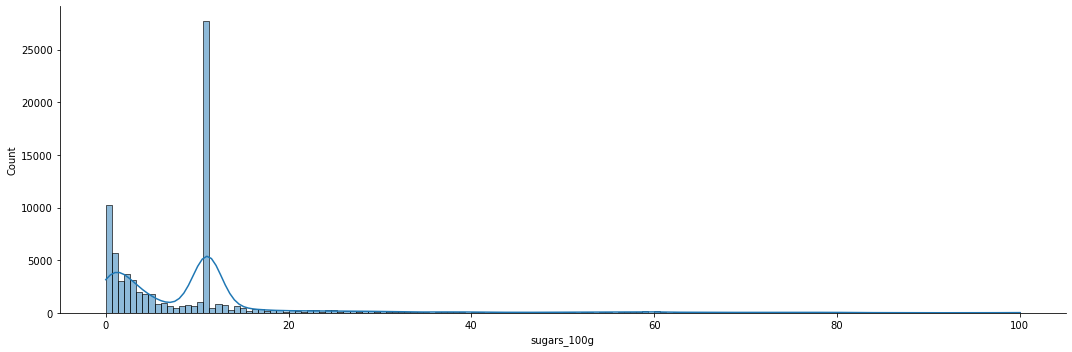

In [63]:

# Dans le but de comparer voici la distribution après imputation

df24['sugars_100g'] = df24['sugars_100g'].astype(float)
sns.displot(x = 'sugars_100g', data = df24, kde = True, aspect = 3, bins=150)

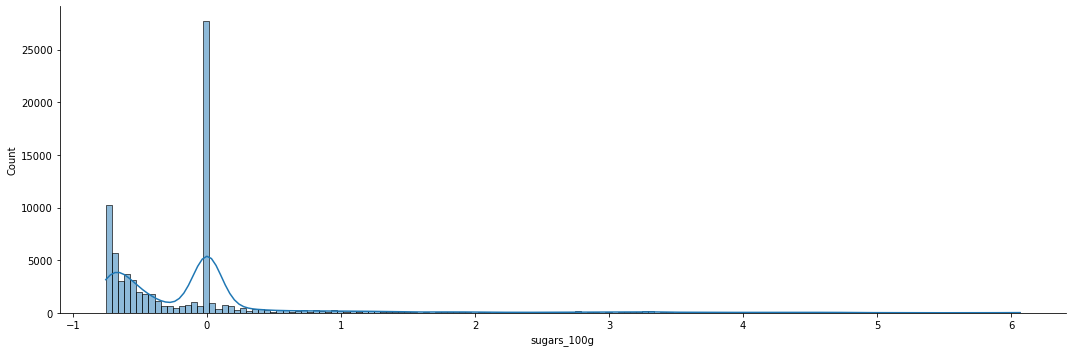

In [146]:
# Dans le but de comparer voici la distribution après imputation (données standardisées)

df26['sugars_100g'] = df26['sugars_100g'].astype(float)
sns.displot(x = 'sugars_100g', data = df26, kde = True, aspect = 3, bins=150)

# 
#### Boxplot avant et après imputation par KNNImputer

<AxesSubplot:xlabel='sugars_100g'>

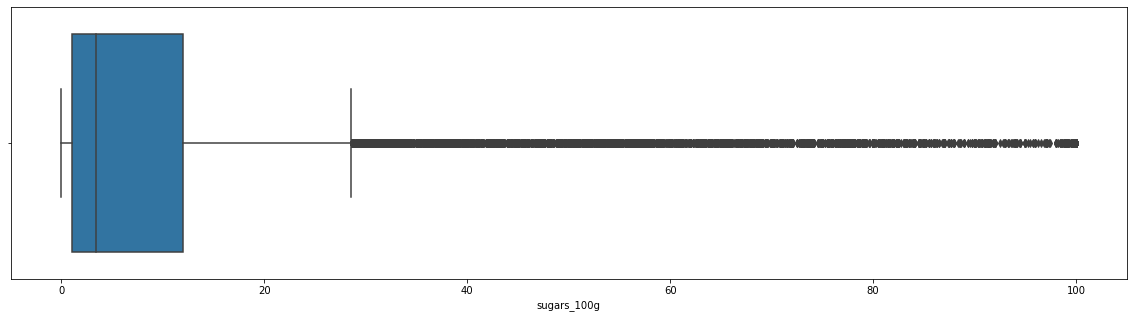

In [64]:

# Dans le but de comparer voici le boxplot avant imputation

plt.figure(figsize=(20, 5))
sns.boxplot(x = df22['sugars_100g'])

<AxesSubplot:xlabel='sugars_100g'>

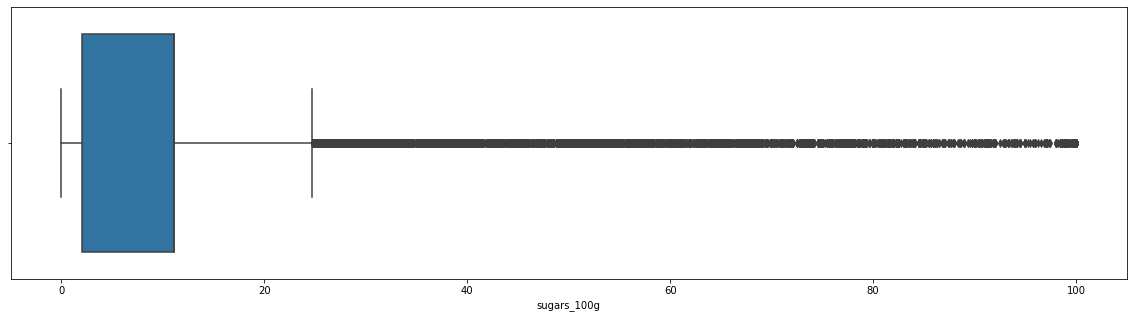

In [65]:

# Dans le but de comparer voici le boxplot après imputation

plt.figure(figsize=(20, 5))
sns.boxplot(x = df24['sugars_100g'])

In [66]:
df22['sugars_100g'].describe()

count    49783.000000
mean        11.104778
std         18.217569
min          0.000000
25%          1.000000
50%          3.400000
75%         12.000000
max        100.000000
Name: sugars_100g, dtype: float64

In [67]:
df23['sugars_100g'].describe()

count     78550.000000
unique     2280.000000
top          11.104778
freq      26666.000000
Name: sugars_100g, dtype: float64

In [68]:
df24['fiber_100g'].describe()

count     78550.0
unique      672.0
top           0.0
freq      53565.0
Name: fiber_100g, dtype: float64

In [69]:
df24['fiber_100g'].isna().sum()

0

#### 
#### Distribution avant et après imputation des nan par 0

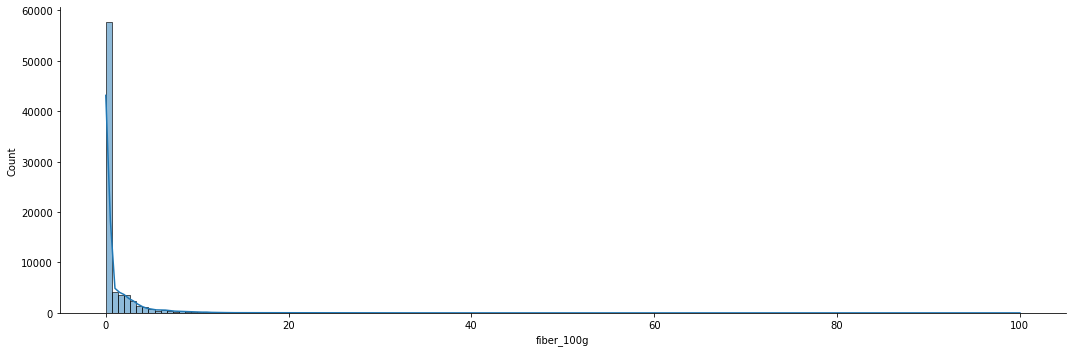

In [70]:
# Distribution des fibres avant imputation par 0

sns.displot(x = 'fiber_100g', data = df22, kde = True, aspect = 3, bins=150)


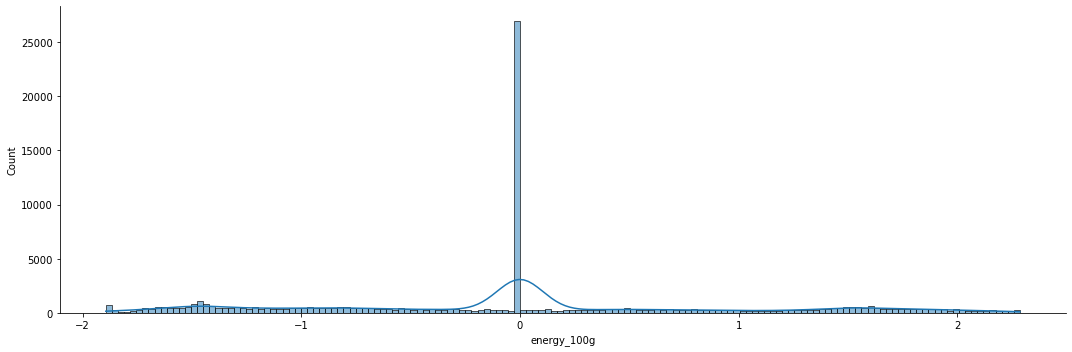

In [149]:
# Dans le but de comparer voici la distribution après imputation (données standardisées)

df26['fiber_100g'] = df26['fiber_100g'].astype(float)
sns.displot(data = df26, x = df26 ['energy_100g'], kde = True, aspect = 3, bins=150)

#### 
#### Boxplot avant et après imputation des nan par 0

<AxesSubplot:xlabel='fiber_100g'>

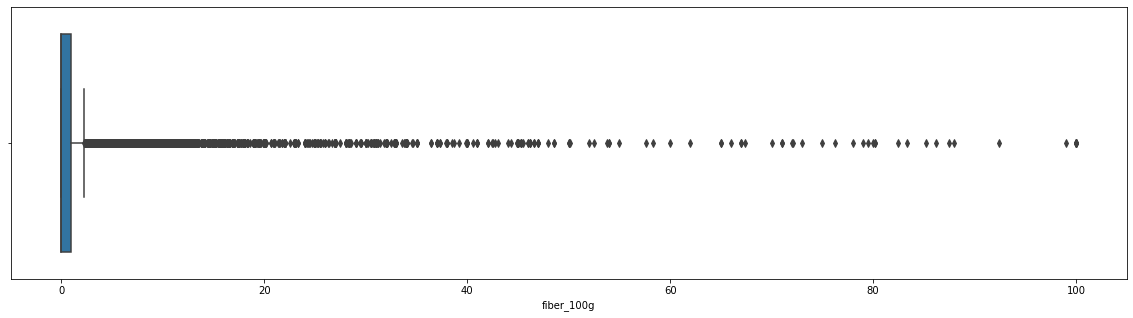

In [79]:

# Boxplot avant imputation par 0

plt.figure(figsize=(20, 5))
sns.boxplot(x = df22['fiber_100g'])

<AxesSubplot:xlabel='fiber_100g'>

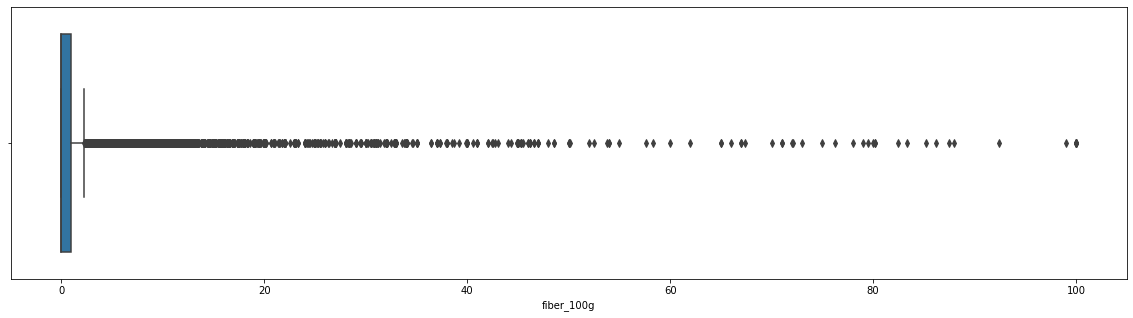

In [80]:

# Boxplot après imputation par 0

plt.figure(figsize=(20, 5))
sns.boxplot(x = df24['fiber_100g'])

In [81]:
df22['fiber_100g'].describe()

count    78550.000000
mean         1.048851
std          3.294339
min          0.000000
25%          0.000000
50%          0.000000
75%          0.900000
max        100.000000
Name: fiber_100g, dtype: float64

In [82]:
df24['fiber_100g'].describe()

count     78550.0
unique      672.0
top           0.0
freq      53565.0
Name: fiber_100g, dtype: float64

#
#
### proteins_100g    ->    Les protéines pour 100g

#### 
#### Distribution avant et après imputation par KNNImputer

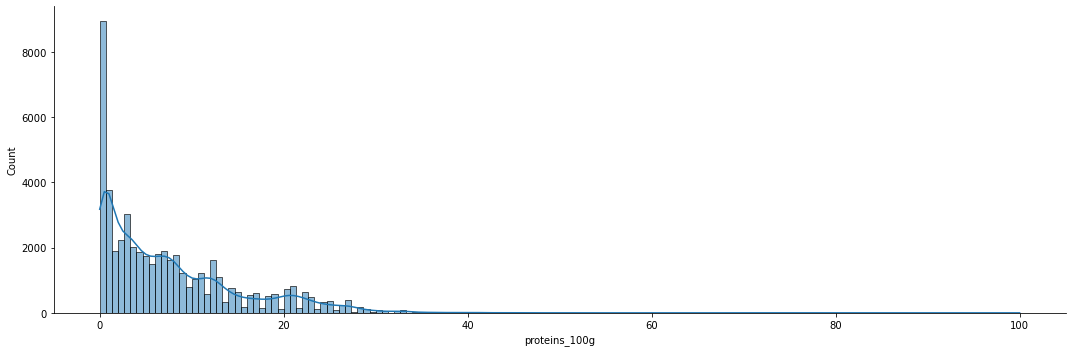

In [83]:

# Dans le but de comparer voici la distribution avant imputation

sns.displot(x = 'proteins_100g', data = df22, kde = True, aspect = 3, bins=150)

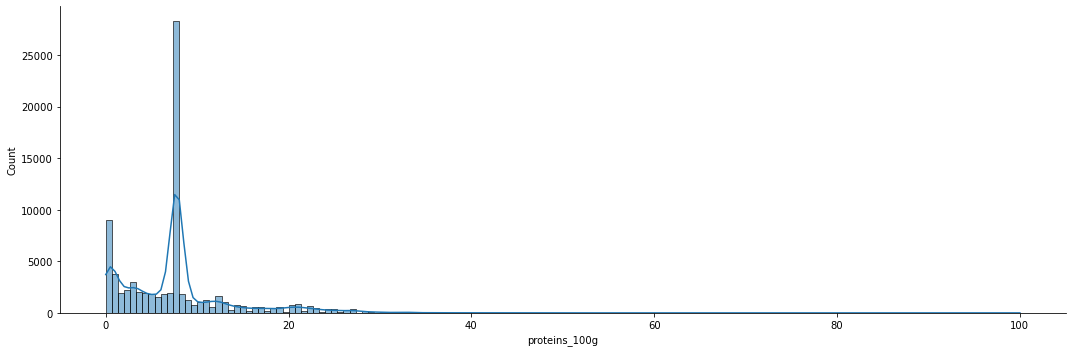

In [84]:

# Dans le but de comparer voici la distribution après imputation

df24['proteins_100g'] = df24['proteins_100g'].astype(float)
sns.displot(x = 'proteins_100g', data = df24, kde = True, aspect = 3, bins=150)


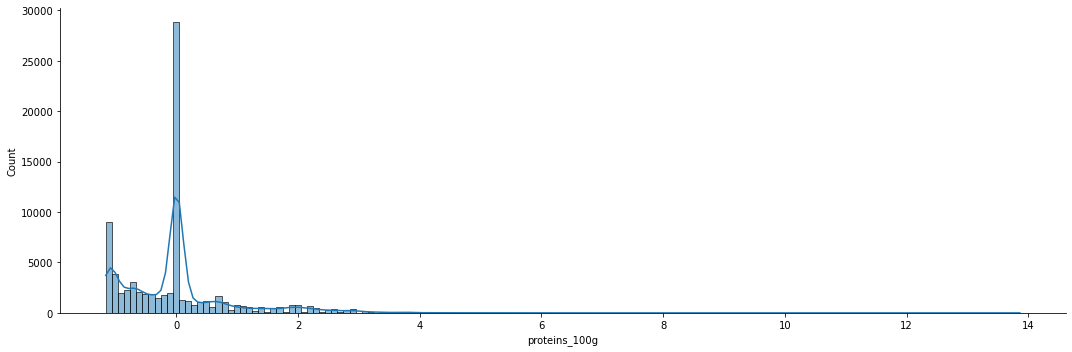

In [145]:
# Dans le but de comparer voici la distribution après imputation (données standardisées)

df26['proteins_100g'] = df26['proteins_100g'].astype(float)
sns.displot(x = 'proteins_100g', data = df26, kde = True, aspect = 3, bins=150)

#### 
#### Boxplot avant et après imputation par KNNImputer

<AxesSubplot:xlabel='proteins_100g'>

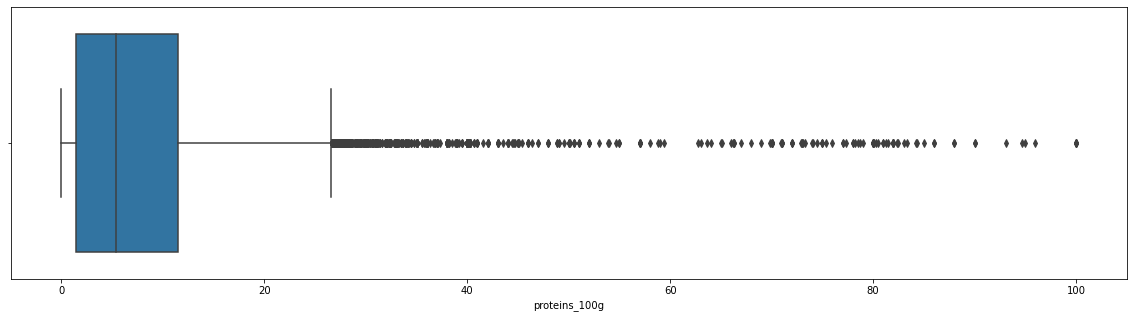

In [85]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = df22['proteins_100g'])

<AxesSubplot:xlabel='proteins_100g'>

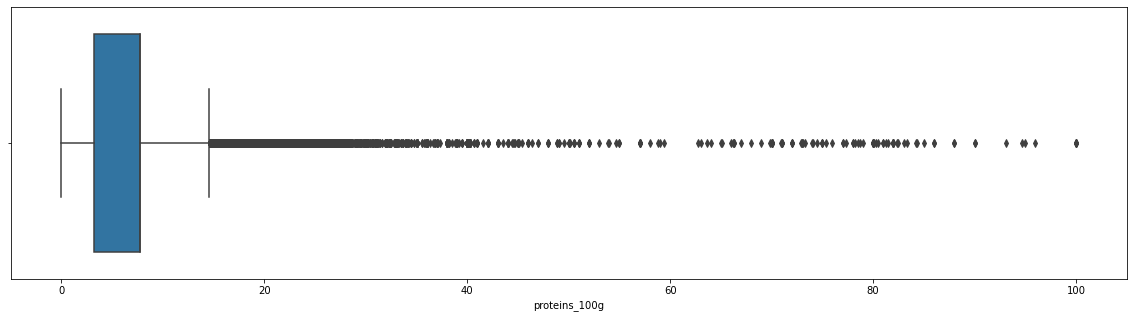

In [86]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = df24['proteins_100g'])

In [87]:
df22['proteins_100g'].describe()

count    51356.000000
mean         7.749905
std          8.213165
min          0.000000
25%          1.400000
50%          5.400000
75%         11.500000
max        100.000000
Name: proteins_100g, dtype: float64

In [88]:
df24['proteins_100g'].describe()

count    78550.000000
mean         7.731046
std          6.655753
min          0.000000
25%          3.200000
50%          7.749905
75%          7.749905
max        100.000000
Name: proteins_100g, dtype: float64

#### 

#
### salt_100g    ->    Le sel pour 100g

#### 
#### Distribution avant et après imputation par KNNImputer

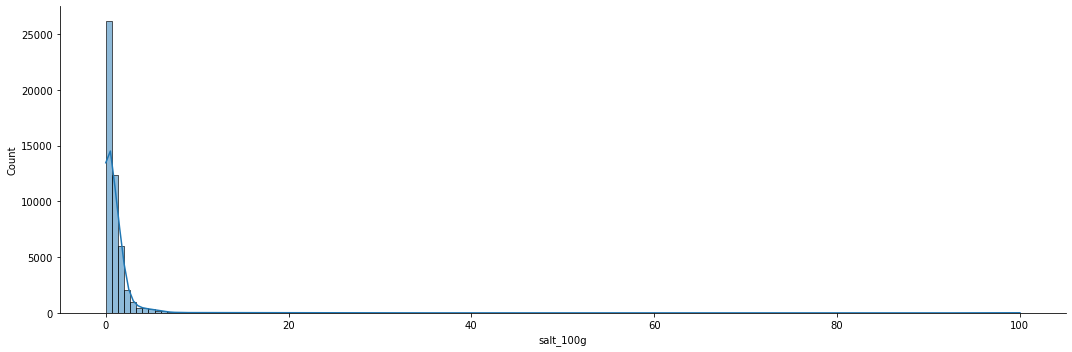

In [89]:

# Dans le but de comparer voici la distribution avant imputation

sns.displot(x = 'salt_100g', data = df22, kde = True, aspect = 3, bins=150)

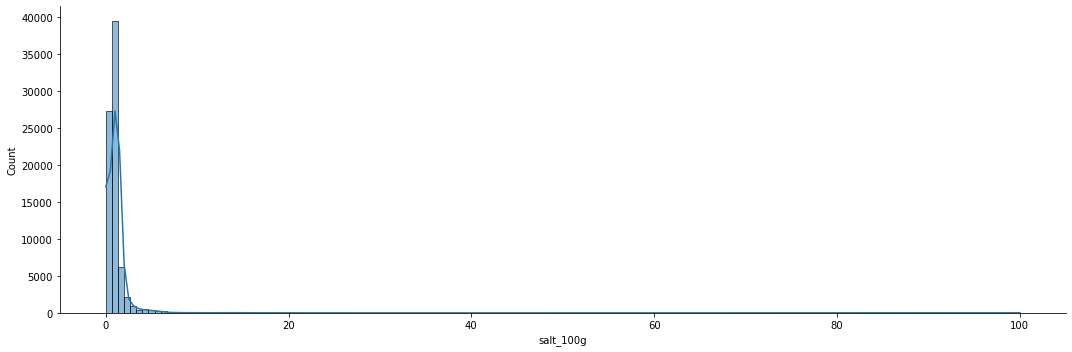

In [90]:

# Dans le but de comparer voici la distribution après imputation

df24['salt_100g'] = df24['salt_100g'].astype(float)
sns.displot(x = 'salt_100g', data = df24, kde = True, aspect = 3, bins=150)

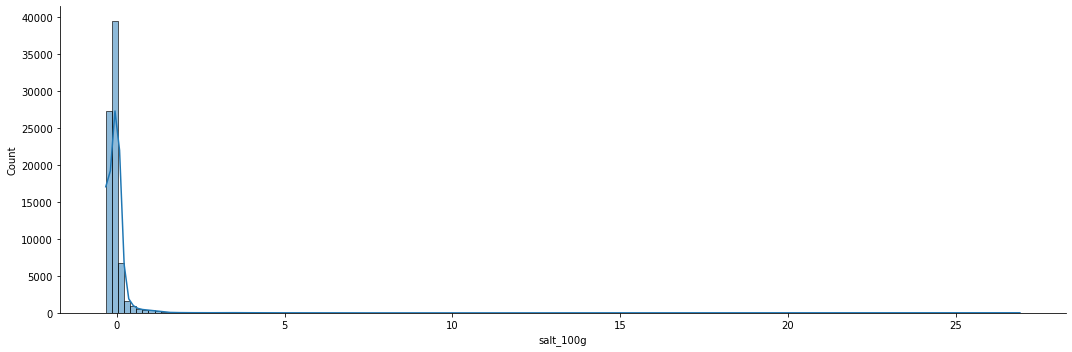

In [144]:
# Dans le but de comparer voici la distribution après imputation (données standardisées)

df26['salt_100g'] = df26['salt_100g'].astype(float)
sns.displot(x = 'salt_100g', data = df26, kde = True, aspect = 3, bins=150)

#### 
#### Boxplot avant et après imputation par KNNImputer

<AxesSubplot:xlabel='salt_100g'>

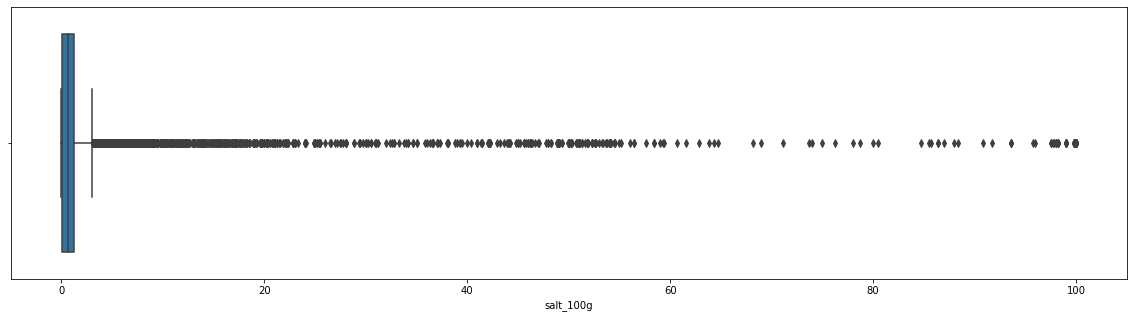

In [91]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = df22['salt_100g'])

<AxesSubplot:xlabel='salt_100g'>

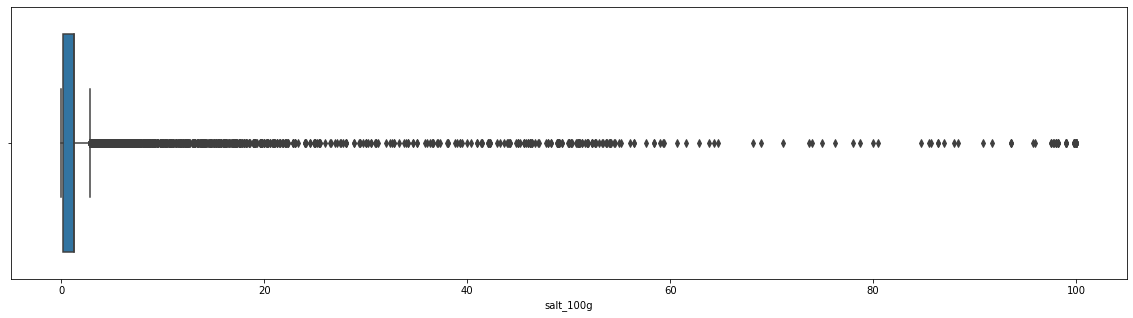

In [92]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = df24['salt_100g'])

In [93]:
df22['salt_100g'].describe()

count    49838.000000
mean         1.225636
std          4.593503
min          0.000000
25%          0.070000
50%          0.600000
75%          1.270000
max        100.000000
Name: salt_100g, dtype: float64

In [94]:
df24['salt_100g'].describe()

count    78550.000000
mean         1.219132
std          3.670530
min          0.000000
25%          0.170000
50%          1.225636
75%          1.225636
max        100.000000
Name: salt_100g, dtype: float64

# 
# 
## nutrition-score-fr_100g    ->    Le nutrition score pour 100g

# 
#### Distribution avant et après imputation par KNNImputer

In [95]:
df24['nutrition-score-fr_100g'] = df24['nutrition-score-fr_100g'].astype(int)

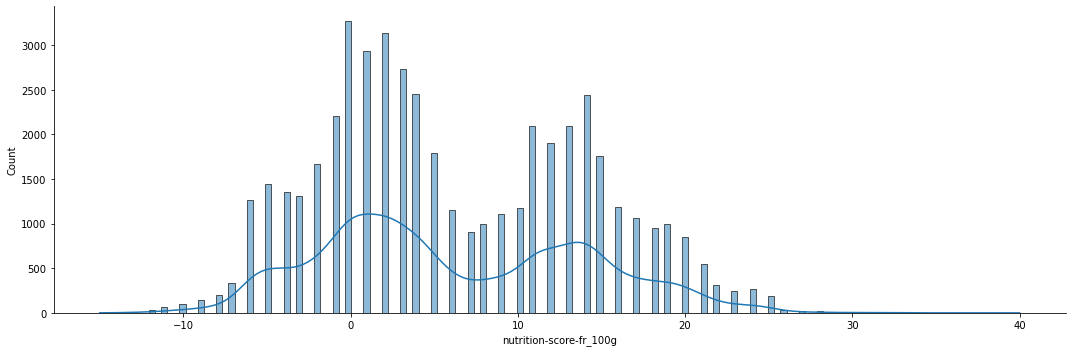

In [96]:

# Dans le but de comparer voici la distribution avant imputation

sns.displot(x = 'nutrition-score-fr_100g', data = df22, kde = True, aspect = 3, bins=150)

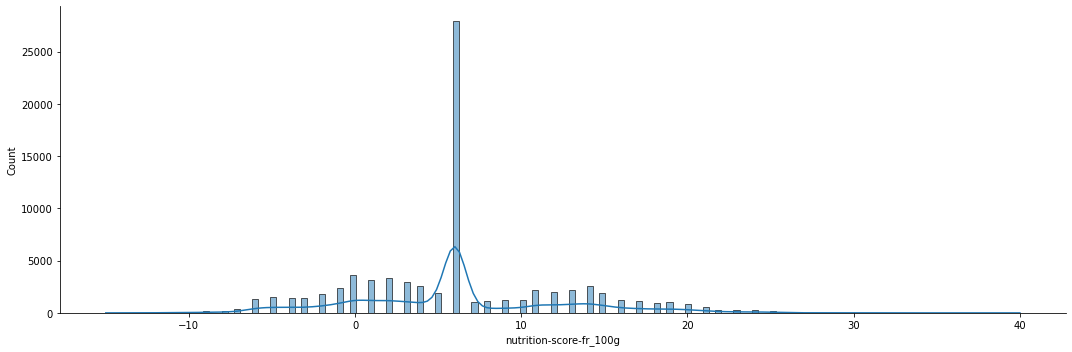

In [97]:

# Dans le but de comparer voici la distribution après imputation

sns.displot(x = 'nutrition-score-fr_100g', data = df24, kde = True, aspect = 3, bins=150)

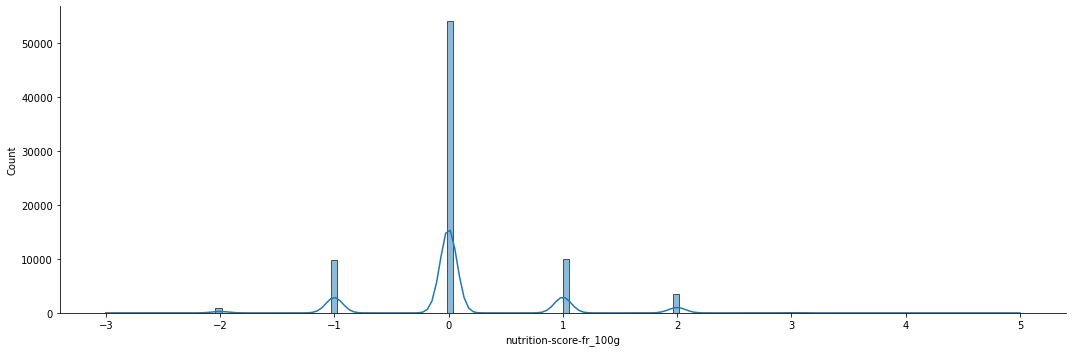

In [143]:

# Dans le but de comparer voici la distribution après imputation (données standardisées)

df26['nutrition-score-fr_100g'] = df26['nutrition-score-fr_100g'].astype(int)
sns.displot(x = 'nutrition-score-fr_100g', data = df26, kde = True, aspect = 3, bins=150)

# 
#### Boxplot avant et après imputation par KNNImputer

<AxesSubplot:xlabel='nutrition-score-fr_100g'>

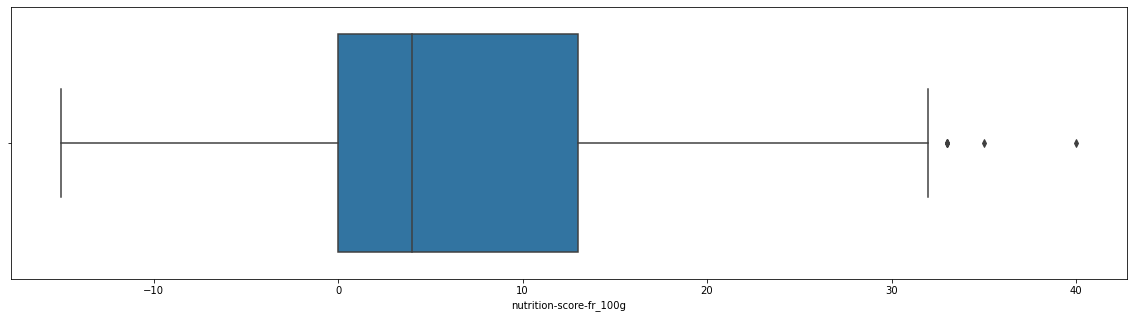

In [98]:

# Dans le but de comparer voici le boxplot avant imputation

plt.figure(figsize=(20, 5))
sns.boxplot(x = df22['nutrition-score-fr_100g'])

<AxesSubplot:xlabel='nutrition-score-fr_100g'>

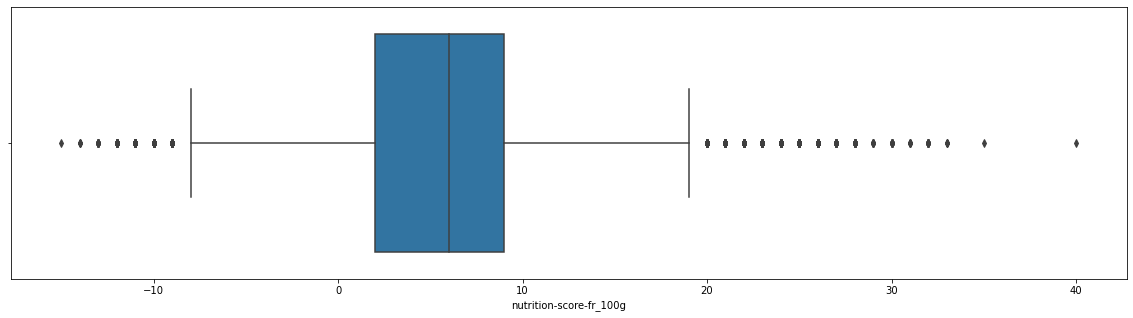

In [99]:

# Dans le but de comparer voici le boxplot après imputation

plt.figure(figsize=(20, 5))
sns.boxplot(x = df24['nutrition-score-fr_100g'])

#  
# 
# Analyse multivariée

## Analyse des corrélations

<AxesSubplot:>

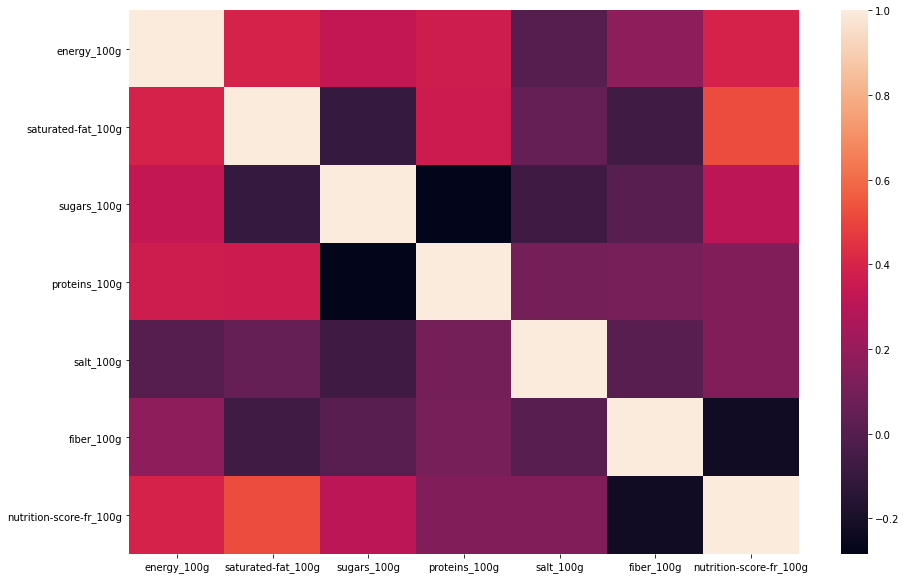

In [151]:
plt.figure(figsize = (15,10))
sns.heatmap(df26[['pnns_groups_2', 'main_category_fr','energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g',
                  'salt_100g', 'fiber_100g', 'nutrition-score-fr_100g']].corr())

Text(0.5, 1.0, 'Analyse bivariée')

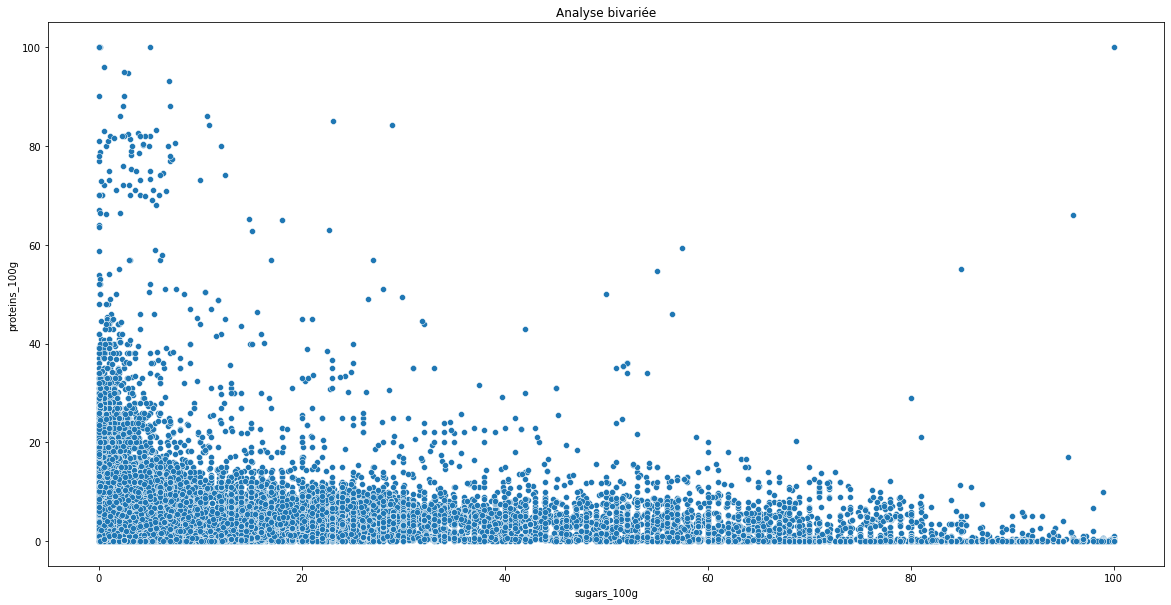

In [101]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x = df24['sugars_100g'], y = df24['proteins_100g'])
plt.title('Analyse bivariée')

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='saturated-fat_100g'>

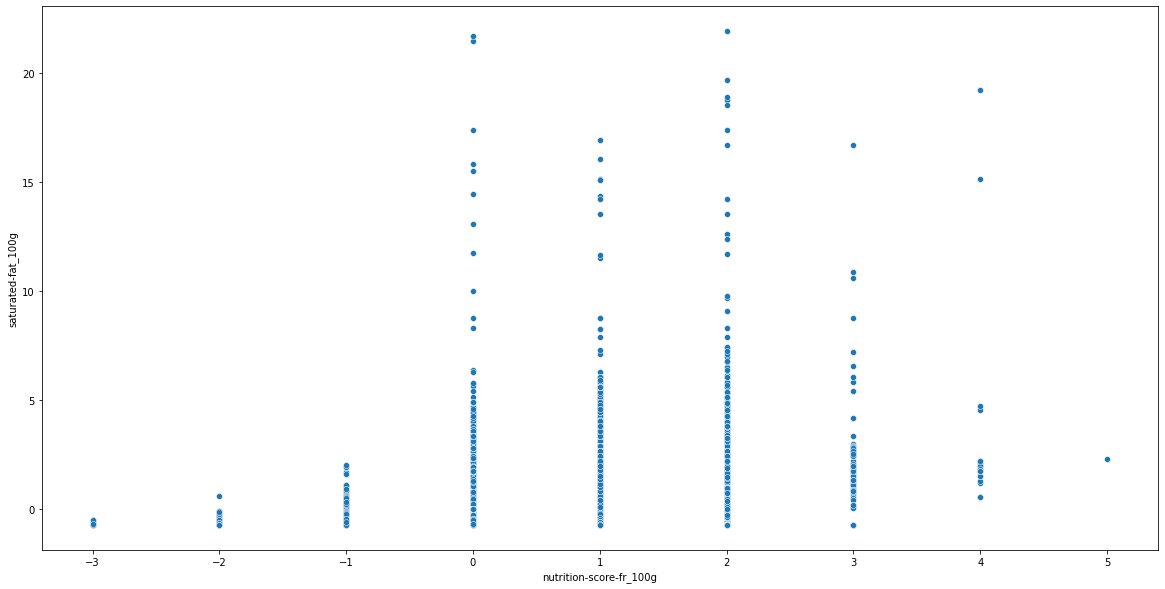

In [152]:

# Représentation avec les données standardisées

plt.figure(figsize=(20, 10))
sns.scatterplot(x = df26['nutrition-score-fr_100g'], y =df26['saturated-fat_100g'])

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='saturated-fat_100g'>

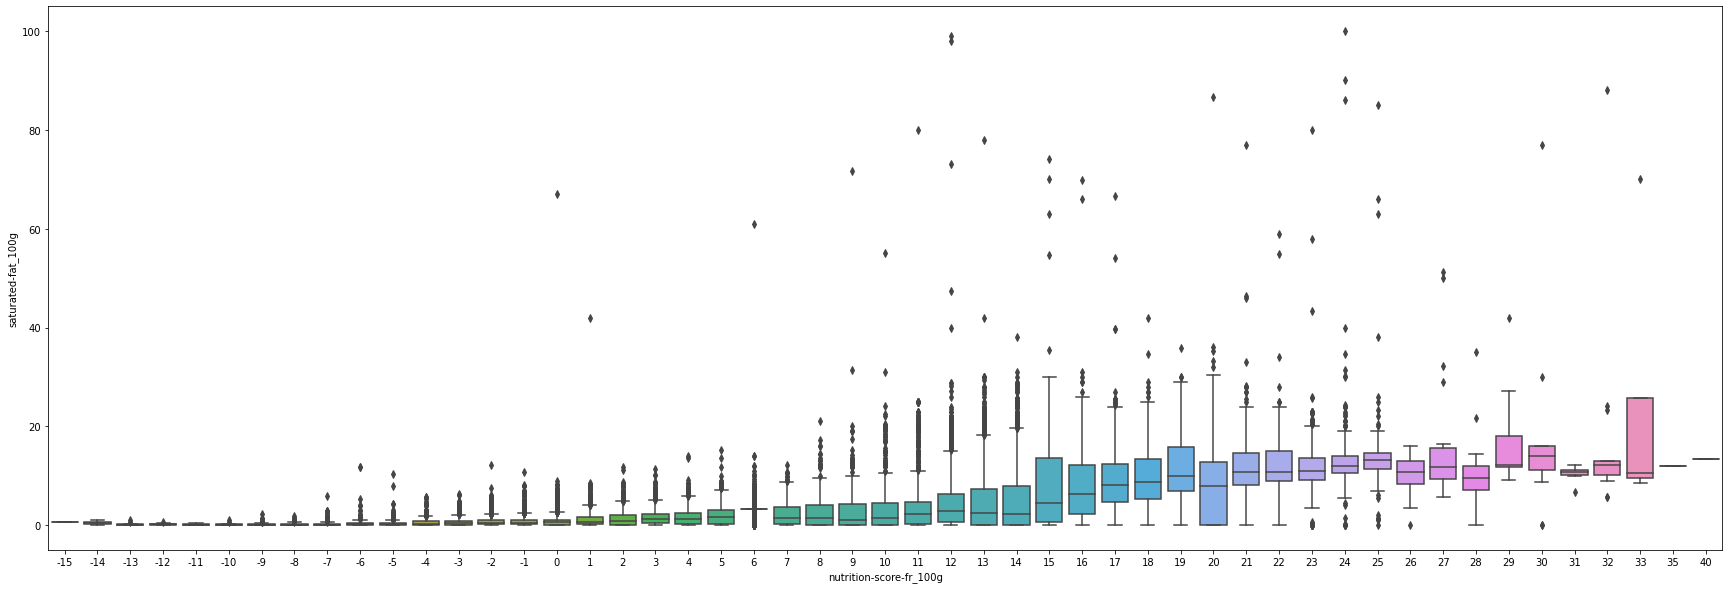

In [154]:
plt.figure(figsize=(30, 10))
sns.boxplot(x = df24['nutrition-score-fr_100g'], y =df24['saturated-fat_100g'])

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='saturated-fat_100g'>

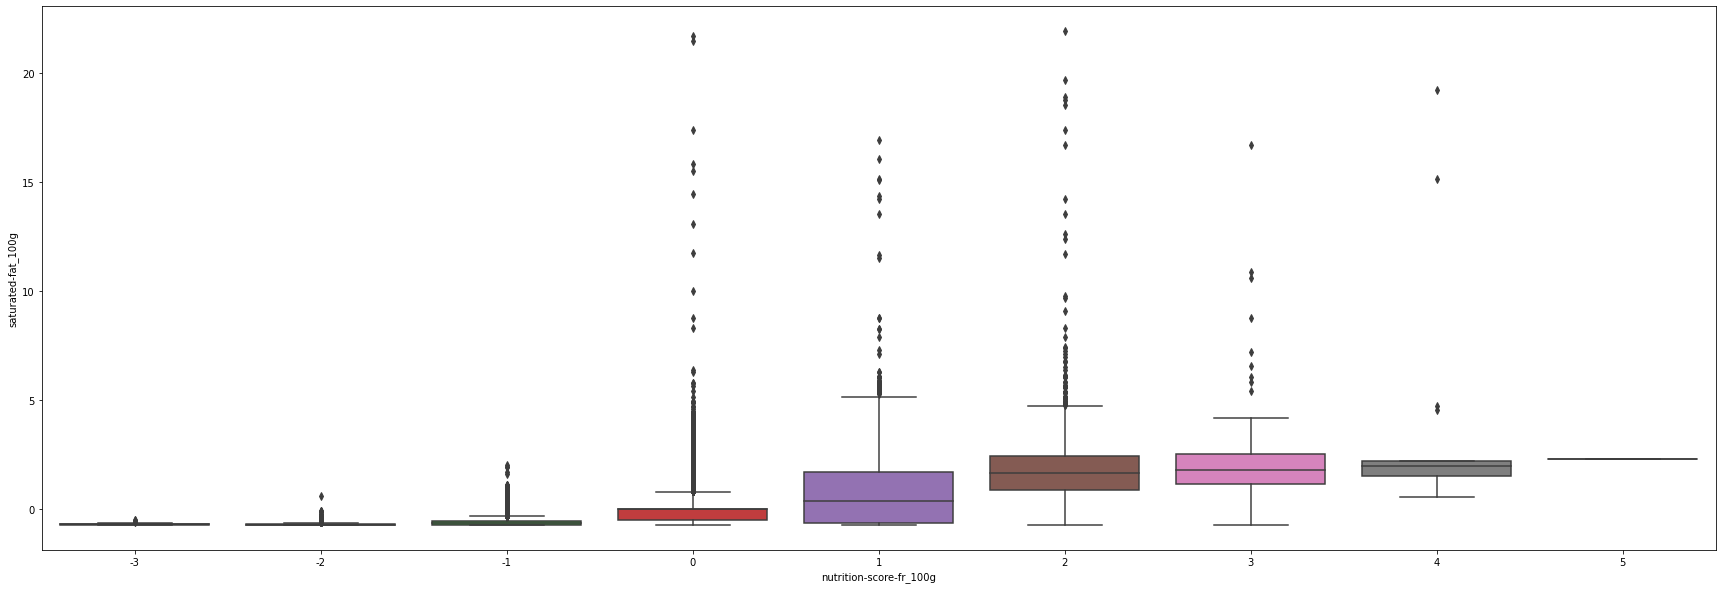

In [153]:

plt.figure(figsize=(30, 10))
sns.boxplot(x = df26['nutrition-score-fr_100g'], y =df26['saturated-fat_100g'])


# 
# ACP

In [117]:
df27 = df24[['nutrition-score-fr_100g','saturated-fat_100g']]
df27

,nutrition-score-fr_100g,saturated-fat_100g
0,6,3.325535
1,6,3.325535
2,6,3.325535
3,8,1.507500
4,6,3.325535
...,...,...
78545,6,3.325535
78546,2,0.200000
78547,6,3.325535
78548,6,3.325535


In [163]:
X = df27.values

In [119]:
a = X[:, 0]
b = X[:, 1]

In [ ]:
# La méthode scipy.stats.pearsonr() sert à déterminer le coeffiecient de corrélation de Pearson
# Ce coefficient représente les relations linéaires entre des variables

In [164]:
coefficient_correlation, pvalue = pearsonr(a, b)

In [165]:
coefficient_correlation

0.557139883038708

In [166]:
pvalue

0.0

In [167]:
def affichage_pca (pca):
    v = pca.explained_variance_ratio_*100
    plt.figure(figsize =(20,10))
    plt.bar(np.arange(len(v))+1, v)
    plt.plot(np.arange(len(v))+1, v.cumsum(), c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    

In [168]:
df28 = df24[['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g',
                  'salt_100g', 'nutrition-score-fr_100g', 'fiber_100g']]

In [169]:
n_comp = 7

In [170]:
features = df28.columns

In [171]:
X1 = df28.values

In [172]:
std_scale = preprocessing.StandardScaler().fit(X1)
X1_scaled = std_scale.transform(X1)


In [173]:
ACP = decomposition.PCA(n_components=n_comp)
X1_ACP = ACP.fit(X1_scaled)

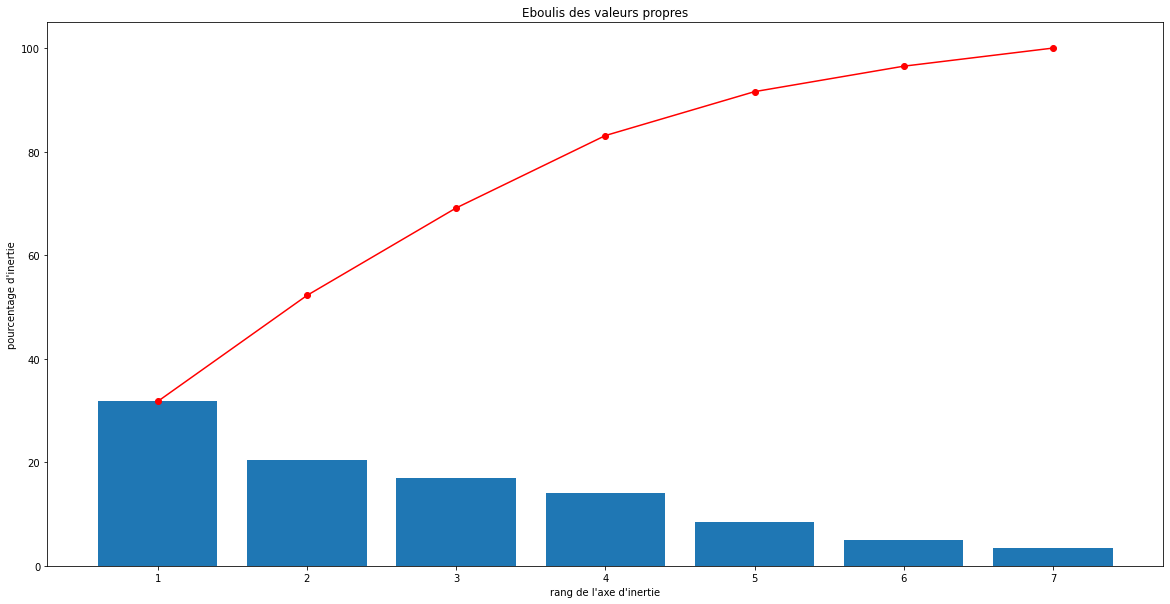

In [174]:
affichage_pca(X1_ACP)

In [131]:
# Affichage des cercle de correlation

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

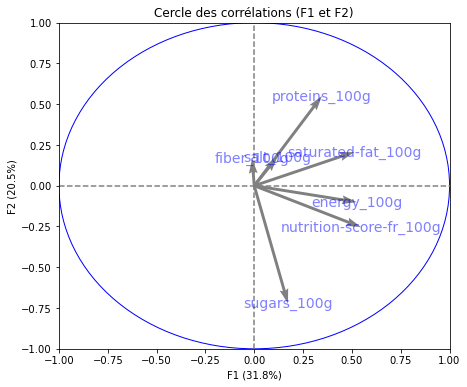

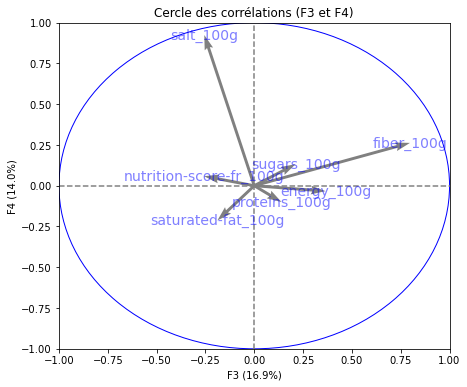

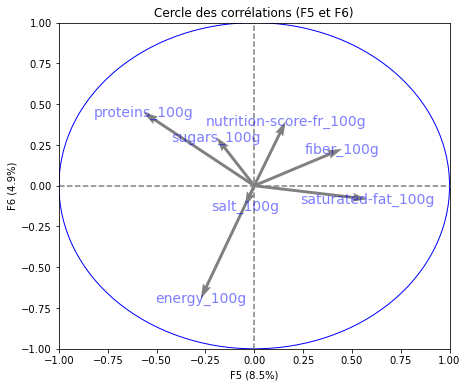

In [132]:
# Cercle des corrélations

pcs = X1_ACP.components_
display_circles(pcs, n_comp, X1_ACP, [(0,1),(2,3),(4,5)], labels = np.array(features))


# 
# ANOVA

<AxesSubplot:xlabel='pnns_groups_2', ylabel='nutrition-score-fr_100g'>

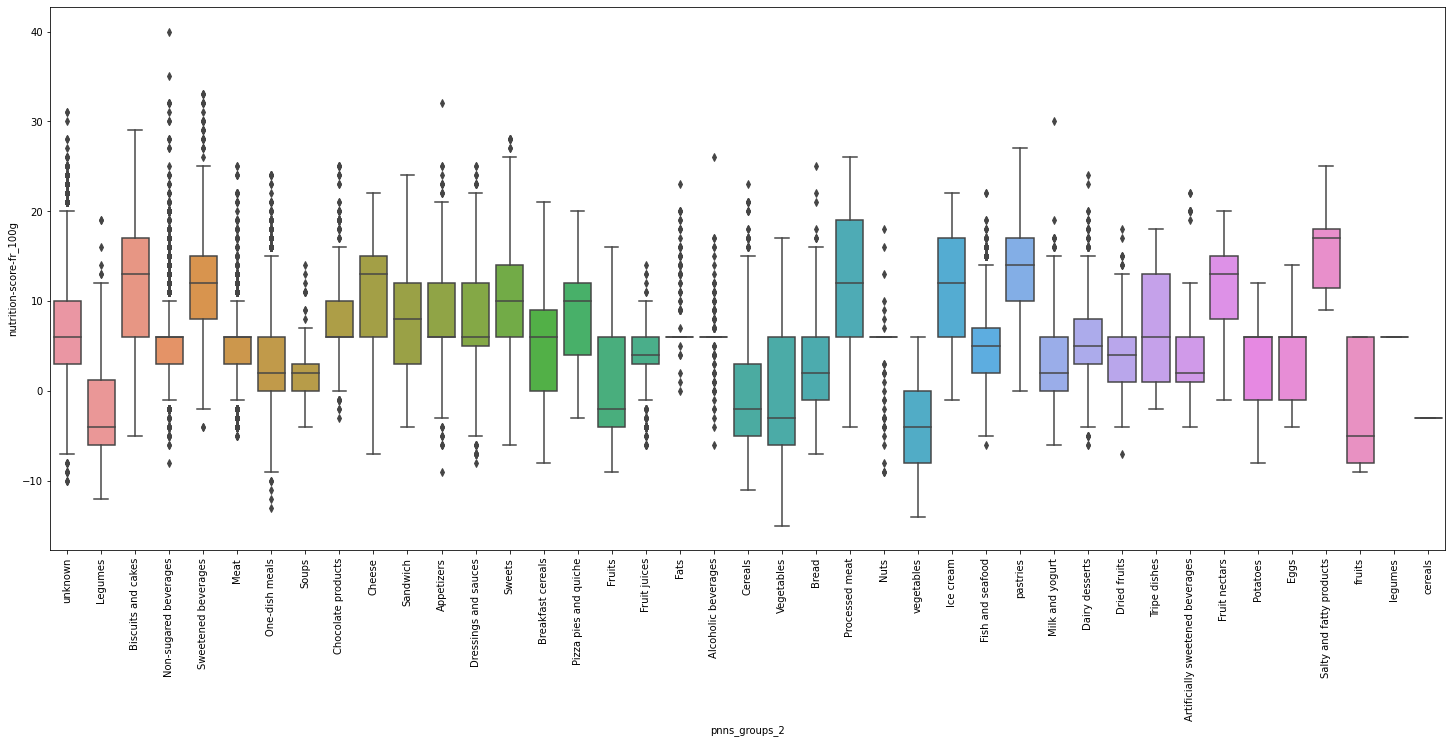

In [156]:
# Représentation du pnns_groups_2 en utilisant les données non standardisées

plt.figure(figsize=(25,10))
plt.xticks(rotation = 90)
sns.boxplot(x = df24['pnns_groups_2'], y = df24['nutrition-score-fr_100g'])

<AxesSubplot:xlabel='pnns_groups_2', ylabel='nutrition-score-fr_100g'>

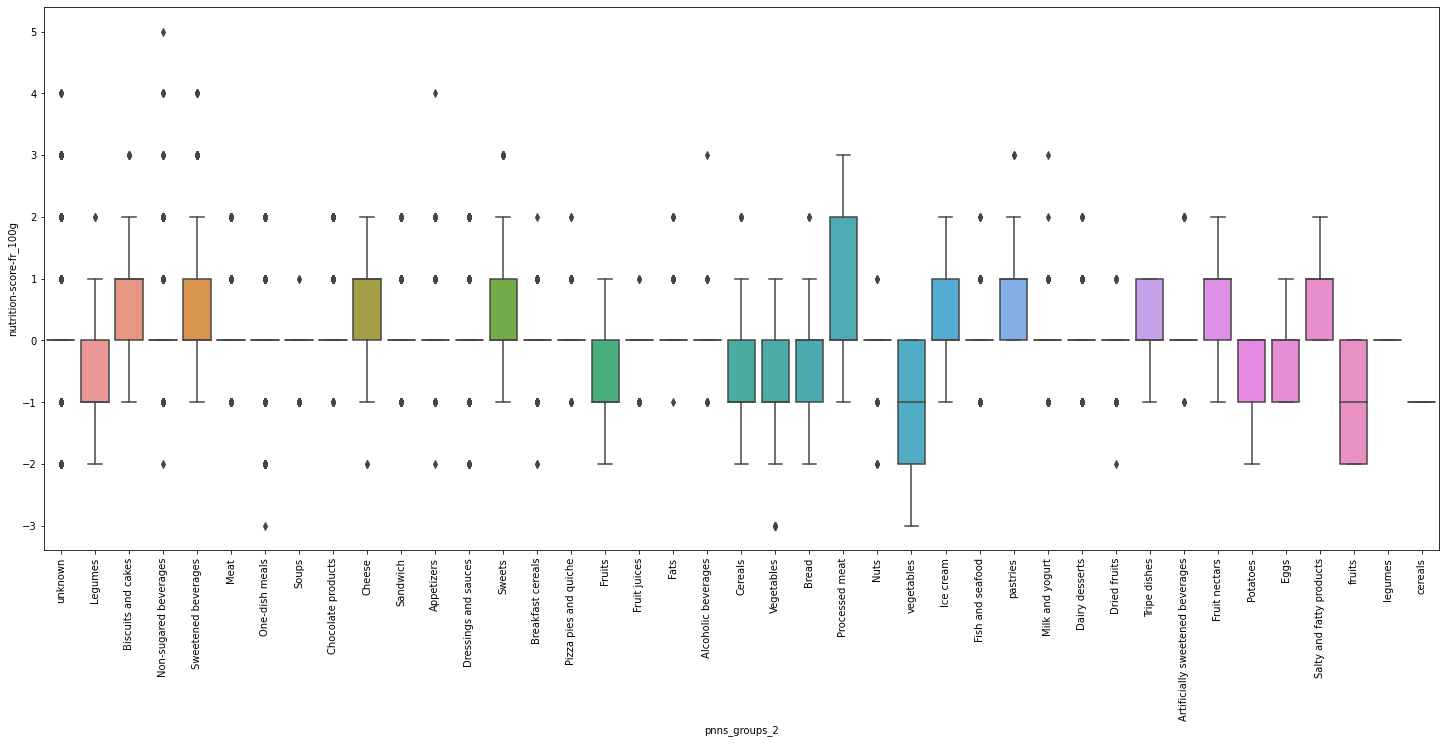

In [155]:

# Nous prenons df26 car les données sont standardisée

plt.figure(figsize=(25,10))
plt.xticks(rotation = 90)
sns.boxplot(x = df26['pnns_groups_2'], y = df26['nutrition-score-fr_100g'])

In [157]:
filtre = df26[df26['pnns_groups_2'].notnull()]

In [158]:
filtre

,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,fiber_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,unknown,Boissons,-0.000512,0.000169,0.002144,0.002834,0.001772,-0.318382,0
1,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,-0.000512,0.000169,0.002144,0.002834,0.001772,-0.318382,0
2,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,Boissons,-0.000512,0.000169,0.002144,0.002834,0.001772,-0.318382,0
3,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",unknown,Boissons,1.487061,-0.412557,0.704944,-0.222523,0.120111,1.563647,0
4,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,1 kg,France,Legumes,Aliments et boissons à base de végétaux,-0.000512,0.000169,0.002144,0.002834,0.001772,-0.318382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78545,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,-0.000512,0.000169,0.002144,0.002834,0.001772,-0.318382,0
78546,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,-1.846756,-0.709383,-0.721261,-1.086442,-0.325223,-0.257671,0
78547,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,unknown,Boissons,-0.000512,0.000169,0.002144,0.002834,0.001772,-0.318382,0
78548,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,-0.000512,0.000169,0.002144,0.002834,0.001772,-0.318382,0


In [159]:
def somme_des_carres(x, y):
    moy_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x == classe]
        classes.append({'ni': len(yi_classe), 
                       'moyenne_classe': yi_classe.mean()})
        
    SCT = sum([(yj-moy_y)**2 for yj in y ])
    SCE = sum([c['ni']*(c['moyenne_classe']-moy_y)**2 for c in classes])
    
    return SCE/SCT
# Nous retournons l'indice de détermination

In [162]:
somme_des_carres(filtre['pnns_groups_2'], filtre['nutrition-score-fr_100g'])

0.2330970380953526

# 
# Observations

In [213]:
produit_choisi = df24.sample(n=1)

In [214]:
produit_choisi

,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,fiber_100g
78395,9310432003946,http://world-fr.openfoodfacts.org/produit/9310...,Sushi rice,1kg,France,Cereals,Riz,1420.0,7.6975,31.35,6.0,0.0,13,0.0
